# Subclustering of lateral ectoderm in NK-data

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/NK-data/seu_HQC_NK.obj')
seu_HQC

An object of class Seurat 
24184 features across 1592 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


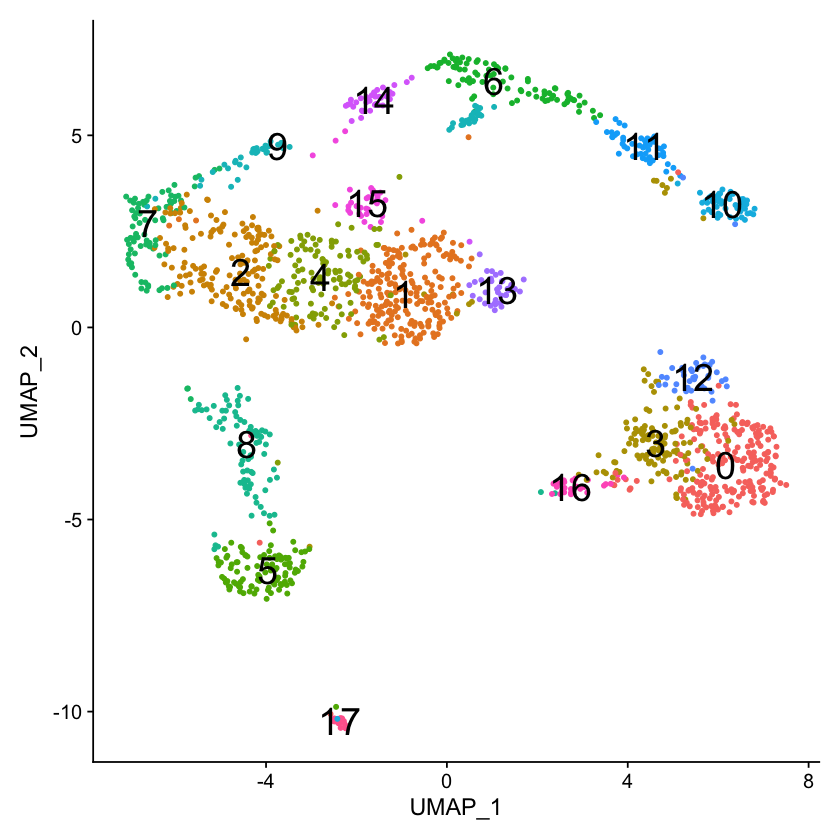

In [3]:
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters

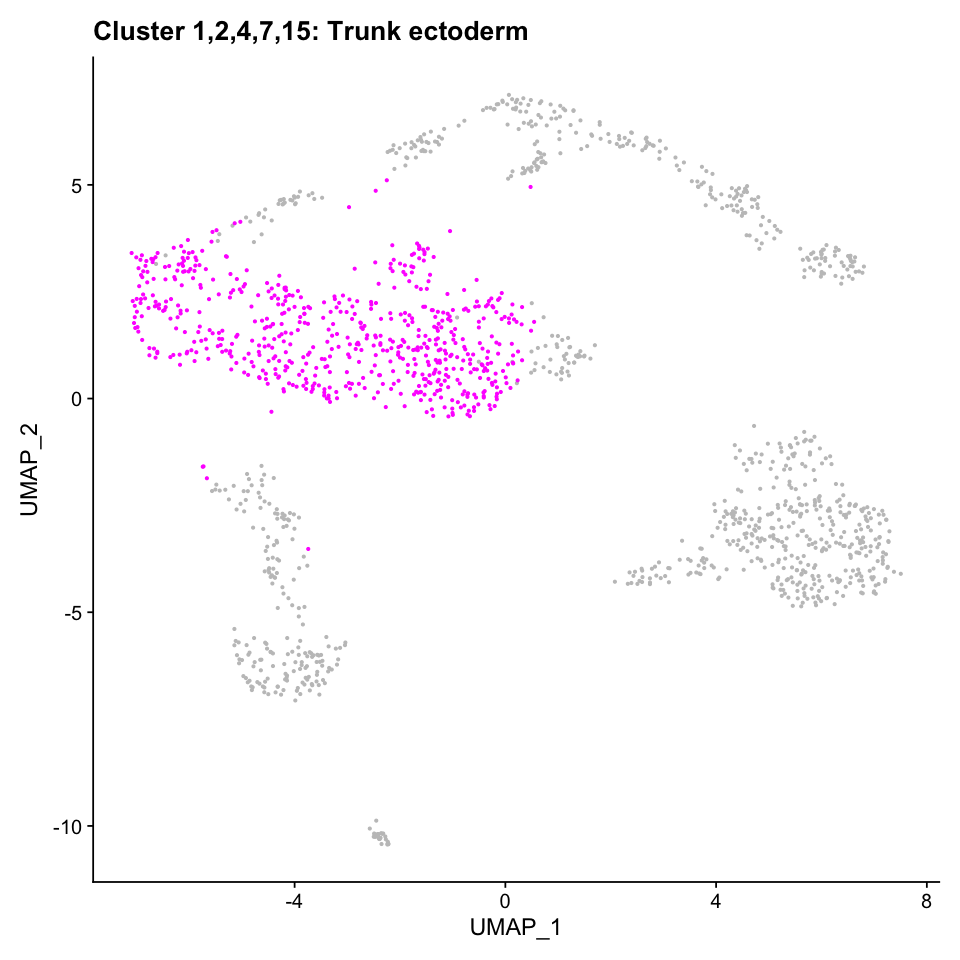

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(1,2,4,7,15))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend()+ ggtitle('Cluster 1,2,4,7,15: Trunk ectoderm')

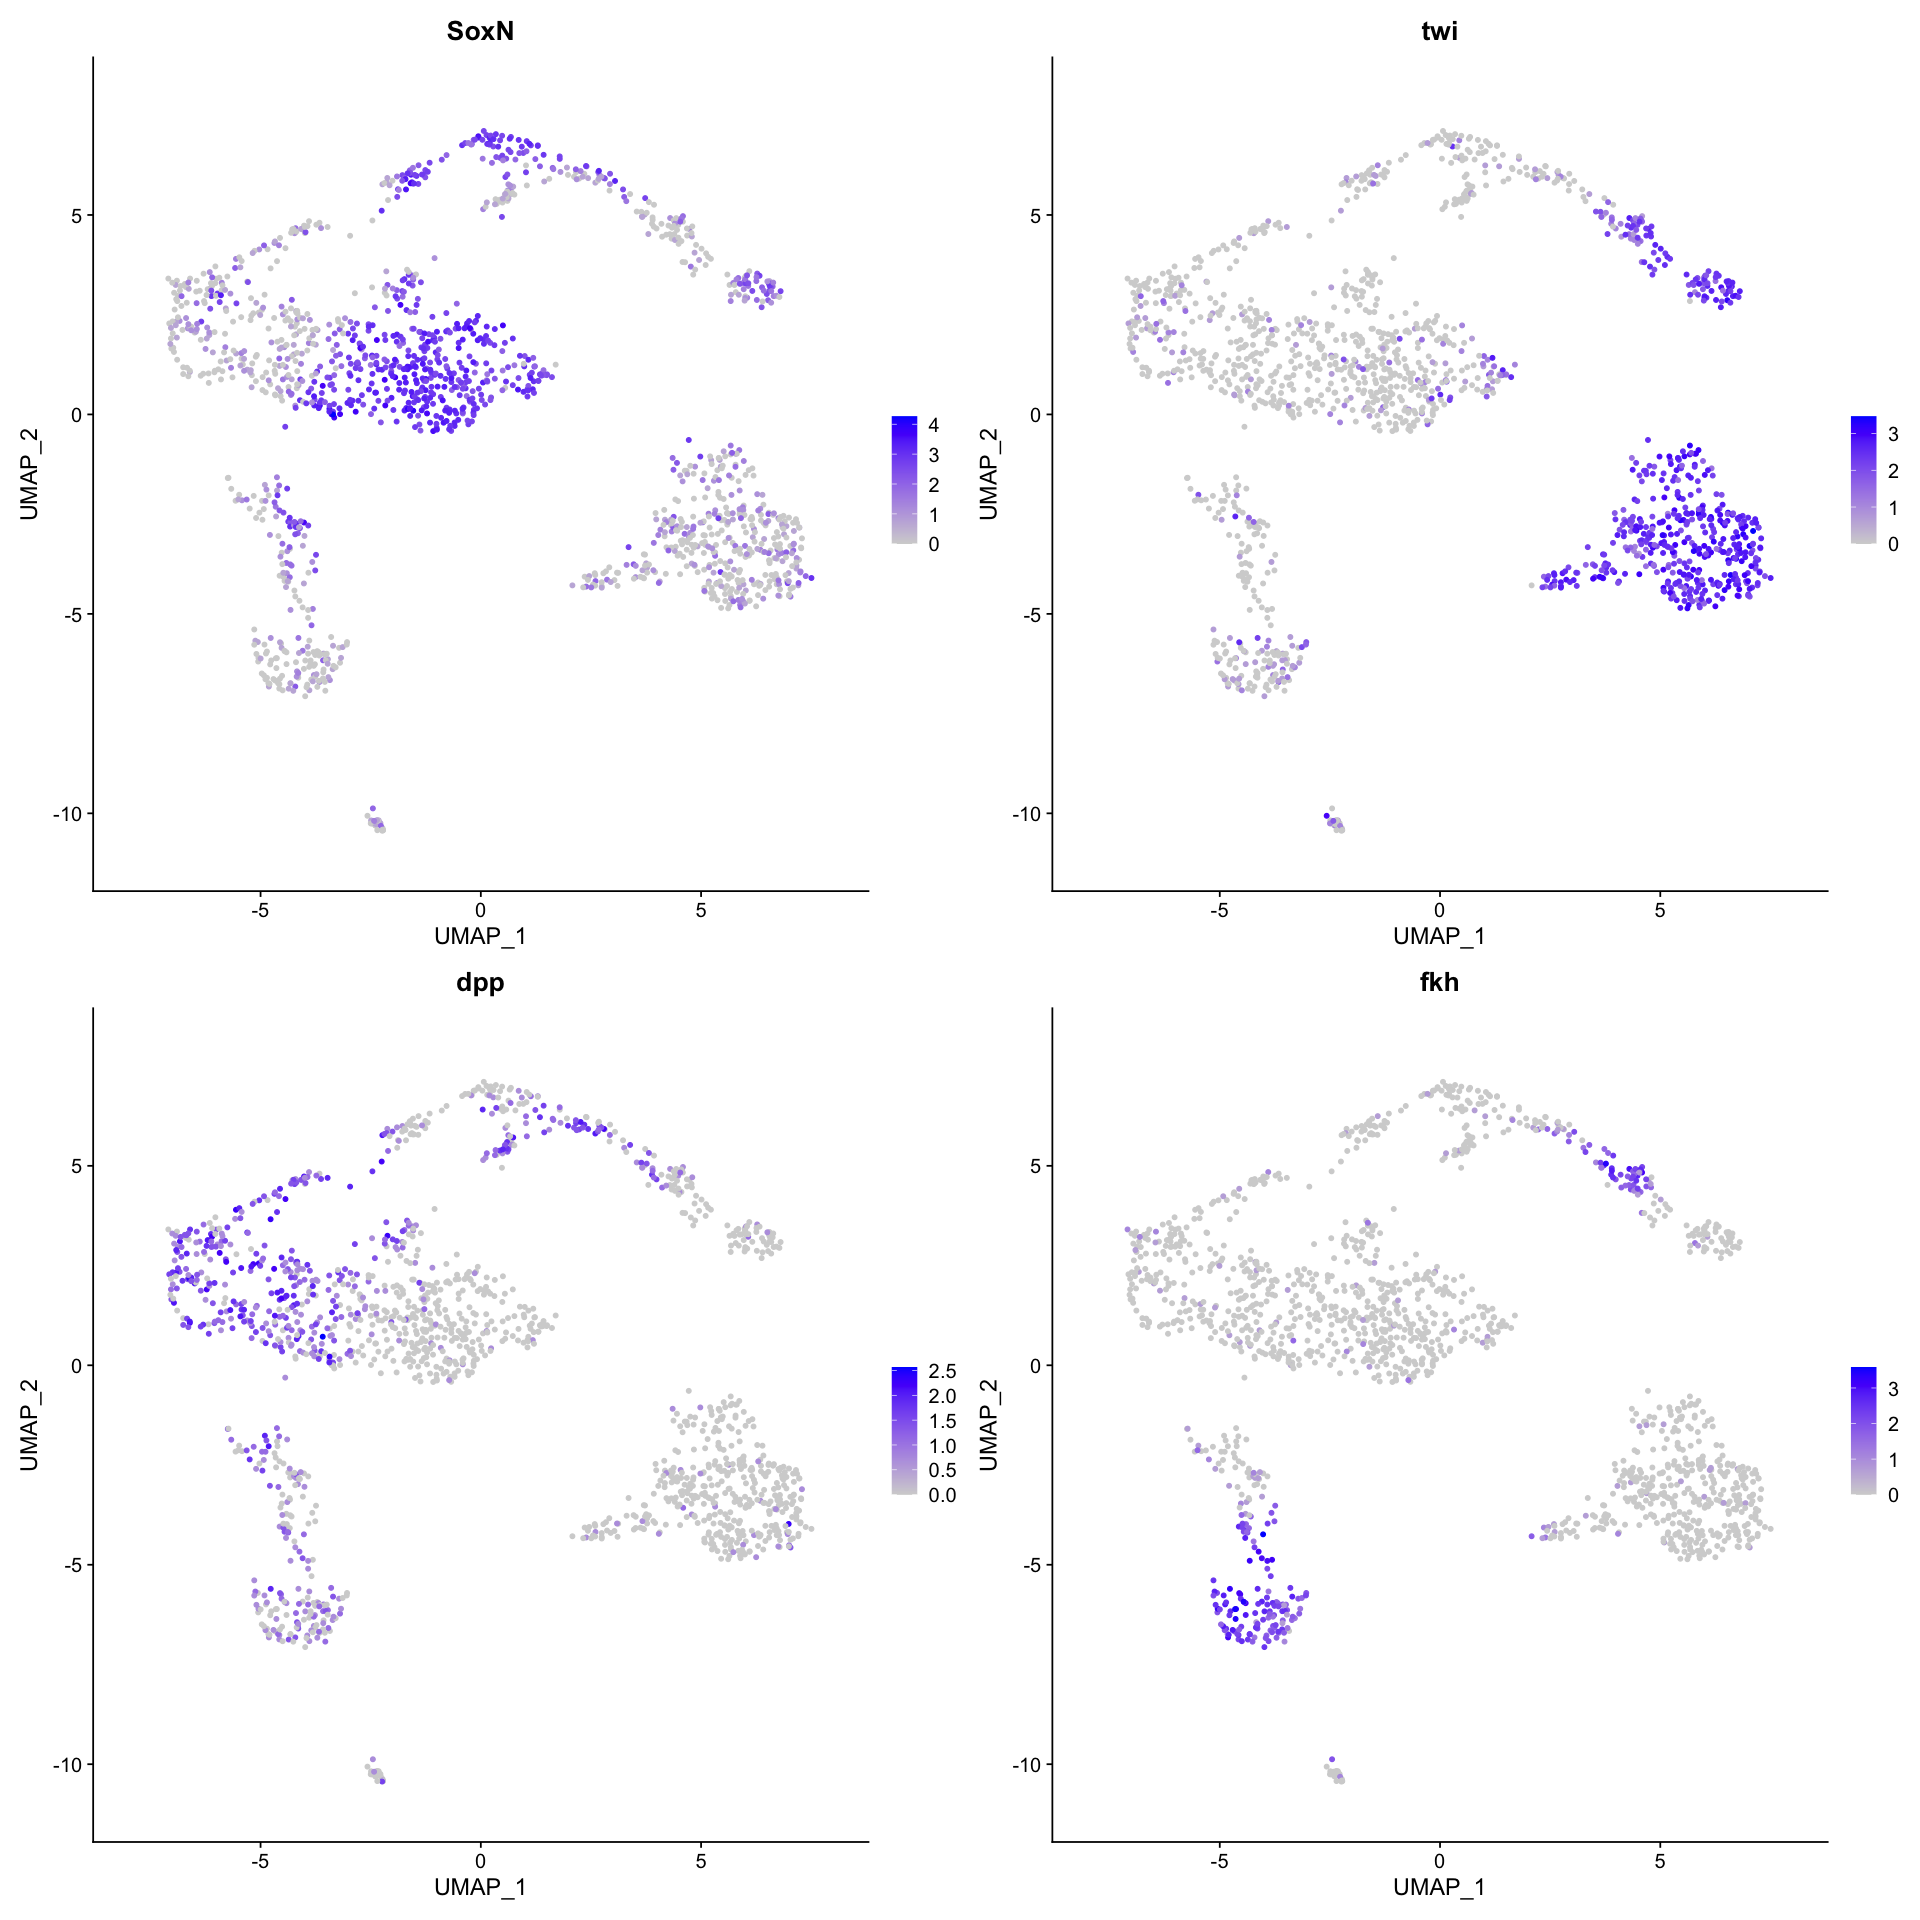

In [5]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, reduction = 'umap', features = c('SoxN', 'twi','dpp','fkh'))

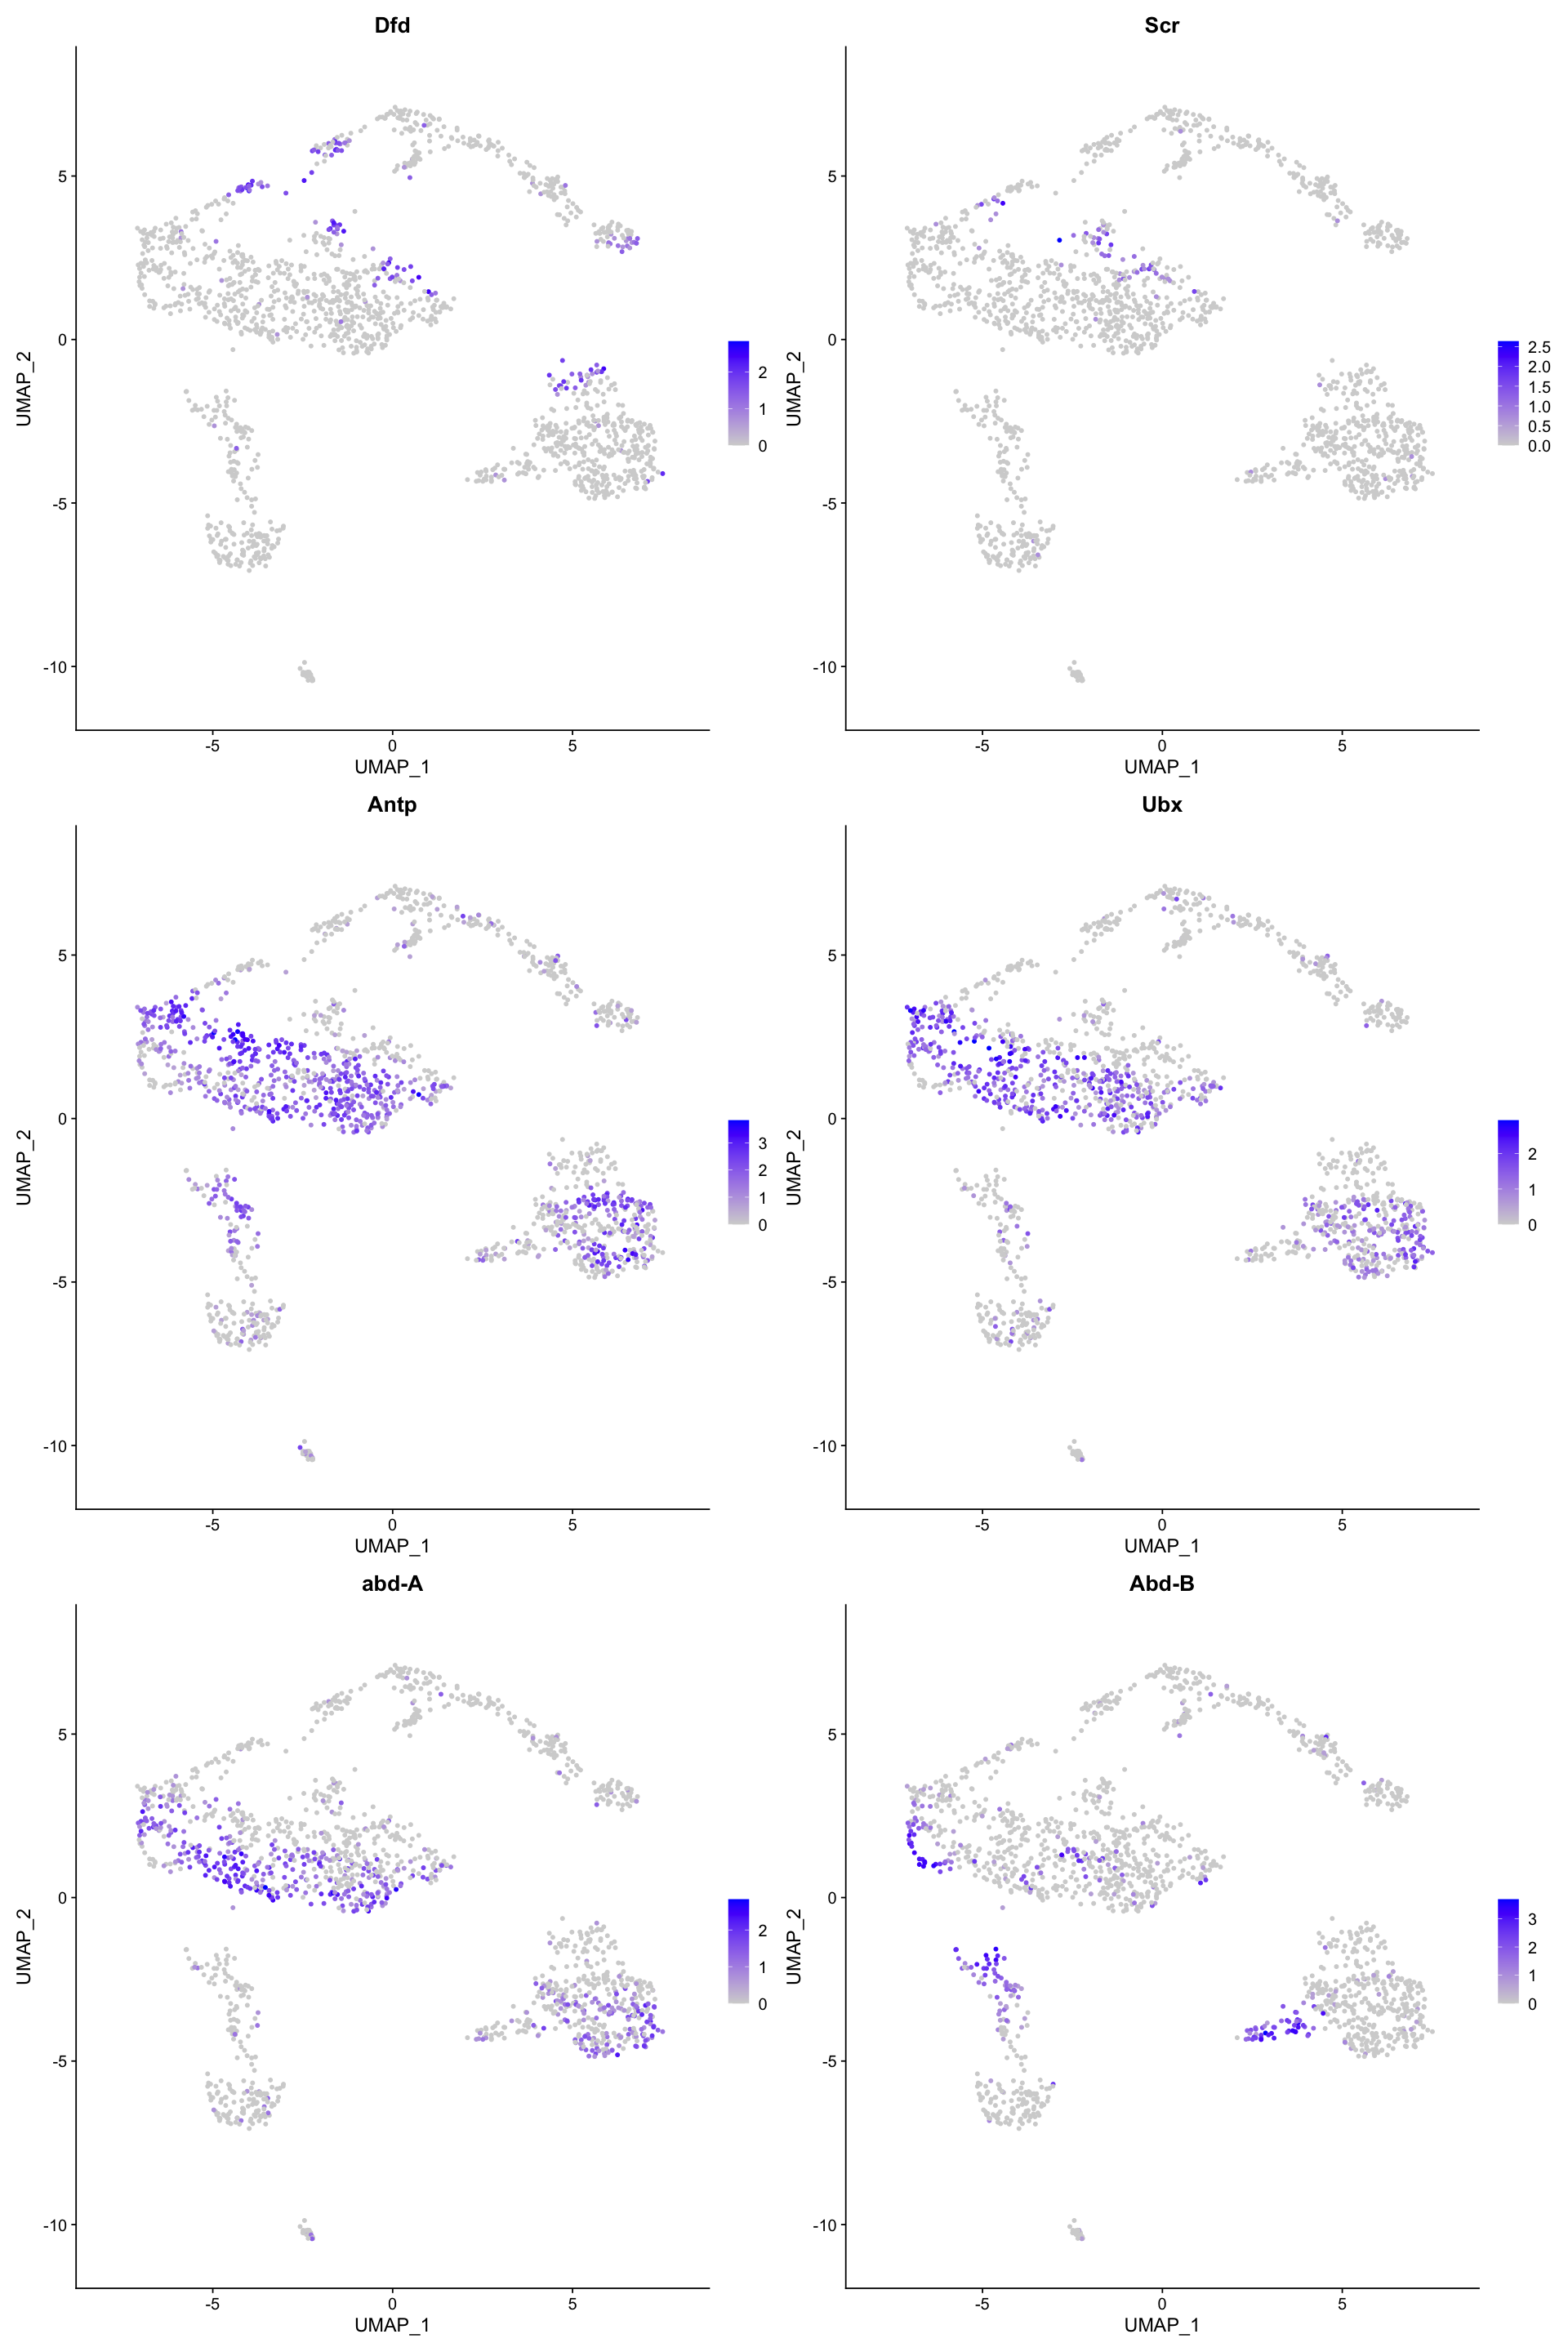

In [6]:
options(repr.plot.width=16, repr.plot.height=24)
FeaturePlot(seu_HQC, reduction = 'umap', features = c('Dfd', 'Scr','Antp','Ubx','abd-A','Abd-B'))

In [7]:
seu.ecto <- subset(seu_HQC, ident = c(1,2,4,7,15))
seu.ecto$all.cell.clusters <- seu.ecto$seurat_clusters
seu.ecto

An object of class Seurat 
24184 features across 627 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

## Re-normalize and clustering

In [8]:
DefaultAssay(seu.ecto) <- "RNA"
seu.ecto <- suppressWarnings(SCTransform(seu.ecto, vars.to.regress = c("percent.mt", "percent.rRNA")))

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8695 by 627

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 627 cells



  |======================================================================| 100%


Found 51 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8695 genes



  |======================================================================| 100%


Computing corrected count matrix for 8695 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 7.496934 secs

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt, percent.rRNA

Centering data matrix

Set default assay to SCT



PC_ 1 
Positive:  SoxN, CG43355-sala, sog, ths, sca, Cys, brk, ImpL2, Pino, tra 
	   slp1, rdx, gsb, Dl, Ilp4, noc, sad, Toll-6, cact, mid 
	   HnRNP-K, path, CG5059, Obp99a, CG42662-CG30080, lok, aay, phyl, vnd, RnrS 
Negative:  emc, Ama, Dtg, Doc1, net, tup, cv-2, egr, Nrt, CG45263 
	   Z600, pnr, mirr, phu, CG12420, Doc3, kek1, hbs, Doc2, CG14915 
	   SNCF, MFS14, CG14427, srp, bun, Svil, rho, ush, peb, zen 
PC_ 2 
Positive:  RpS20, RpLP1, RpS29, RpS26, RpL27A, CG12420, CG14915, RpS3A, RpL15, RpS15 
	   RpLP2, RpL21, RpL10, RpL37a, RpL37A, RpS16, RpS18, RpLP0, RpS8, Ama 
	   RpS25, Doc2, lncRNA:CR43887, Z600, SNCF, RpL27, RpL41, Tctp, Doc3, Doc1 
Negative:  hth, wech, Imp-CR45204, Dl, Trf2, ths, fs(1)h, SoxN, wb, E2f1 
	   kis, CG9821, zld, Antp, N, nmo, fax, ed, sdt, sca 
	   Ppa, spen, Sxl, pre-lola-G-lola, lncRNA:roX1, l(3)neo38, cic, aop, sqd, pAbp 
PC_ 3 
Positive:  sog, D, rho, scyl, tra, toc, CG43355-sala, chrb, vn, brk 
	   SoxN, sca, fend, Ilp4, E(spl)m5-HLH, peb, esg, E(sp

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 627
Number of edges: 28126

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5720
Number of communities: 4
Elapsed time: 0 seconds


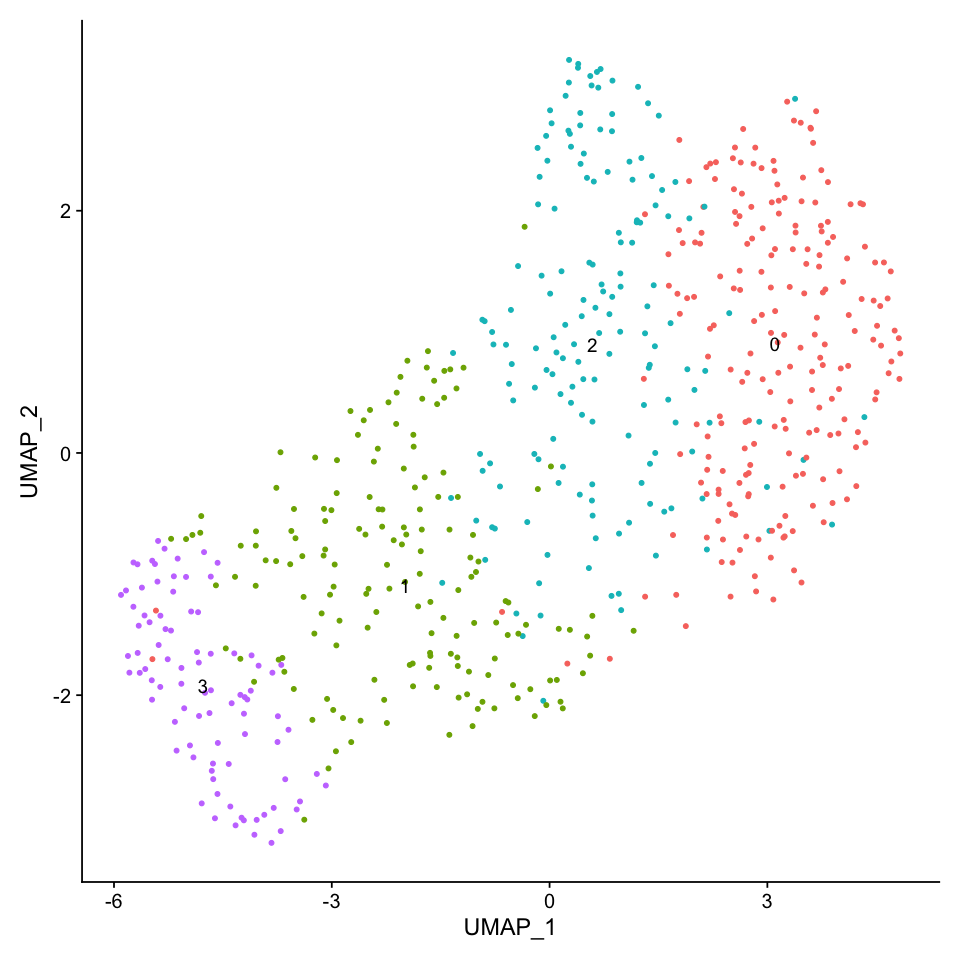

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.ecto <- RunPCA(seu.ecto)
seu.ecto <- RunUMAP(seu.ecto, dims = 1:30)
seu.ecto <- FindNeighbors(seu.ecto, dims = 1:30)
seu.ecto <- FindClusters(seu.ecto)
DimPlot(seu.ecto, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 627
Number of edges: 28126

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4742
Number of communities: 5
Elapsed time: 0 seconds


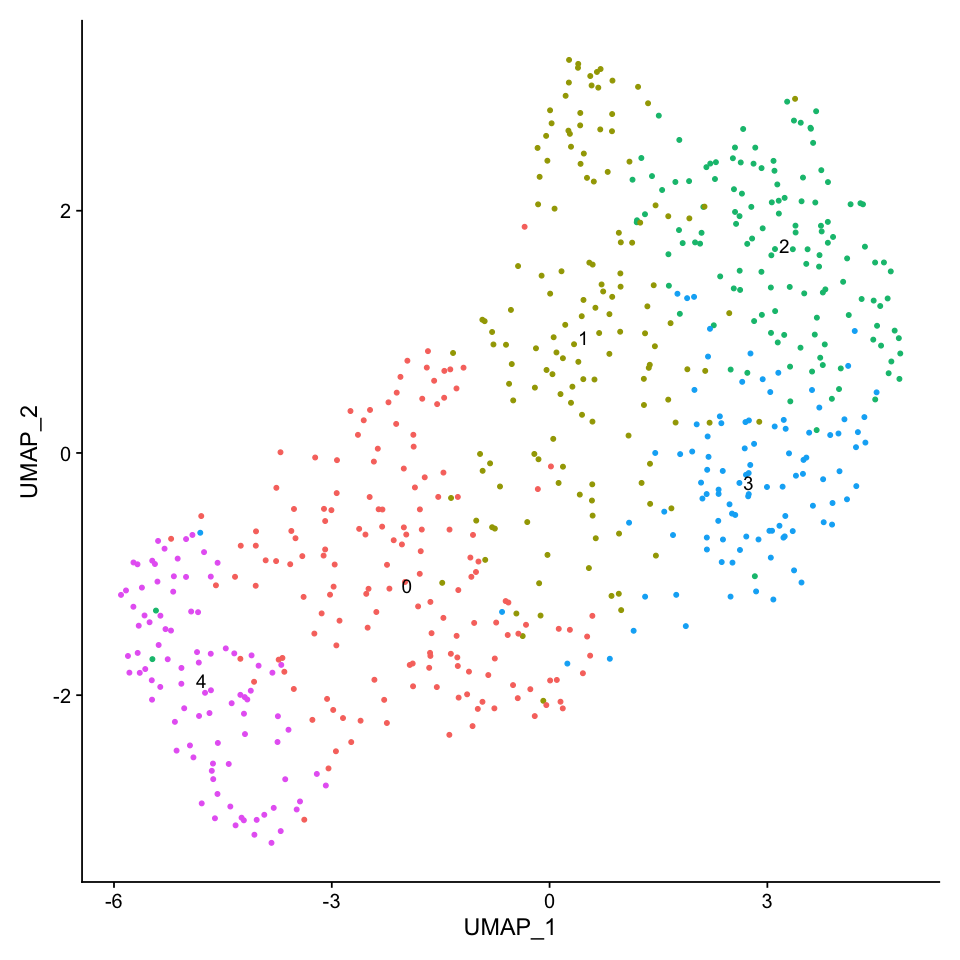

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
seu.ecto <- FindClusters(seu.ecto, resolution = 1.2)
DimPlot(seu.ecto, reduction = 'umap', label = TRUE) + NoLegend()

In [11]:
levels(seu.ecto) <- c(4,0,1,3,2)
all.markers <- FindAllMarkers(object = seu.ecto, only.pos = TRUE)
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

Calculating cluster 4

Calculating cluster 0

Calculating cluster 1

Calculating cluster 3

Calculating cluster 2



[1] 467

[1] 50

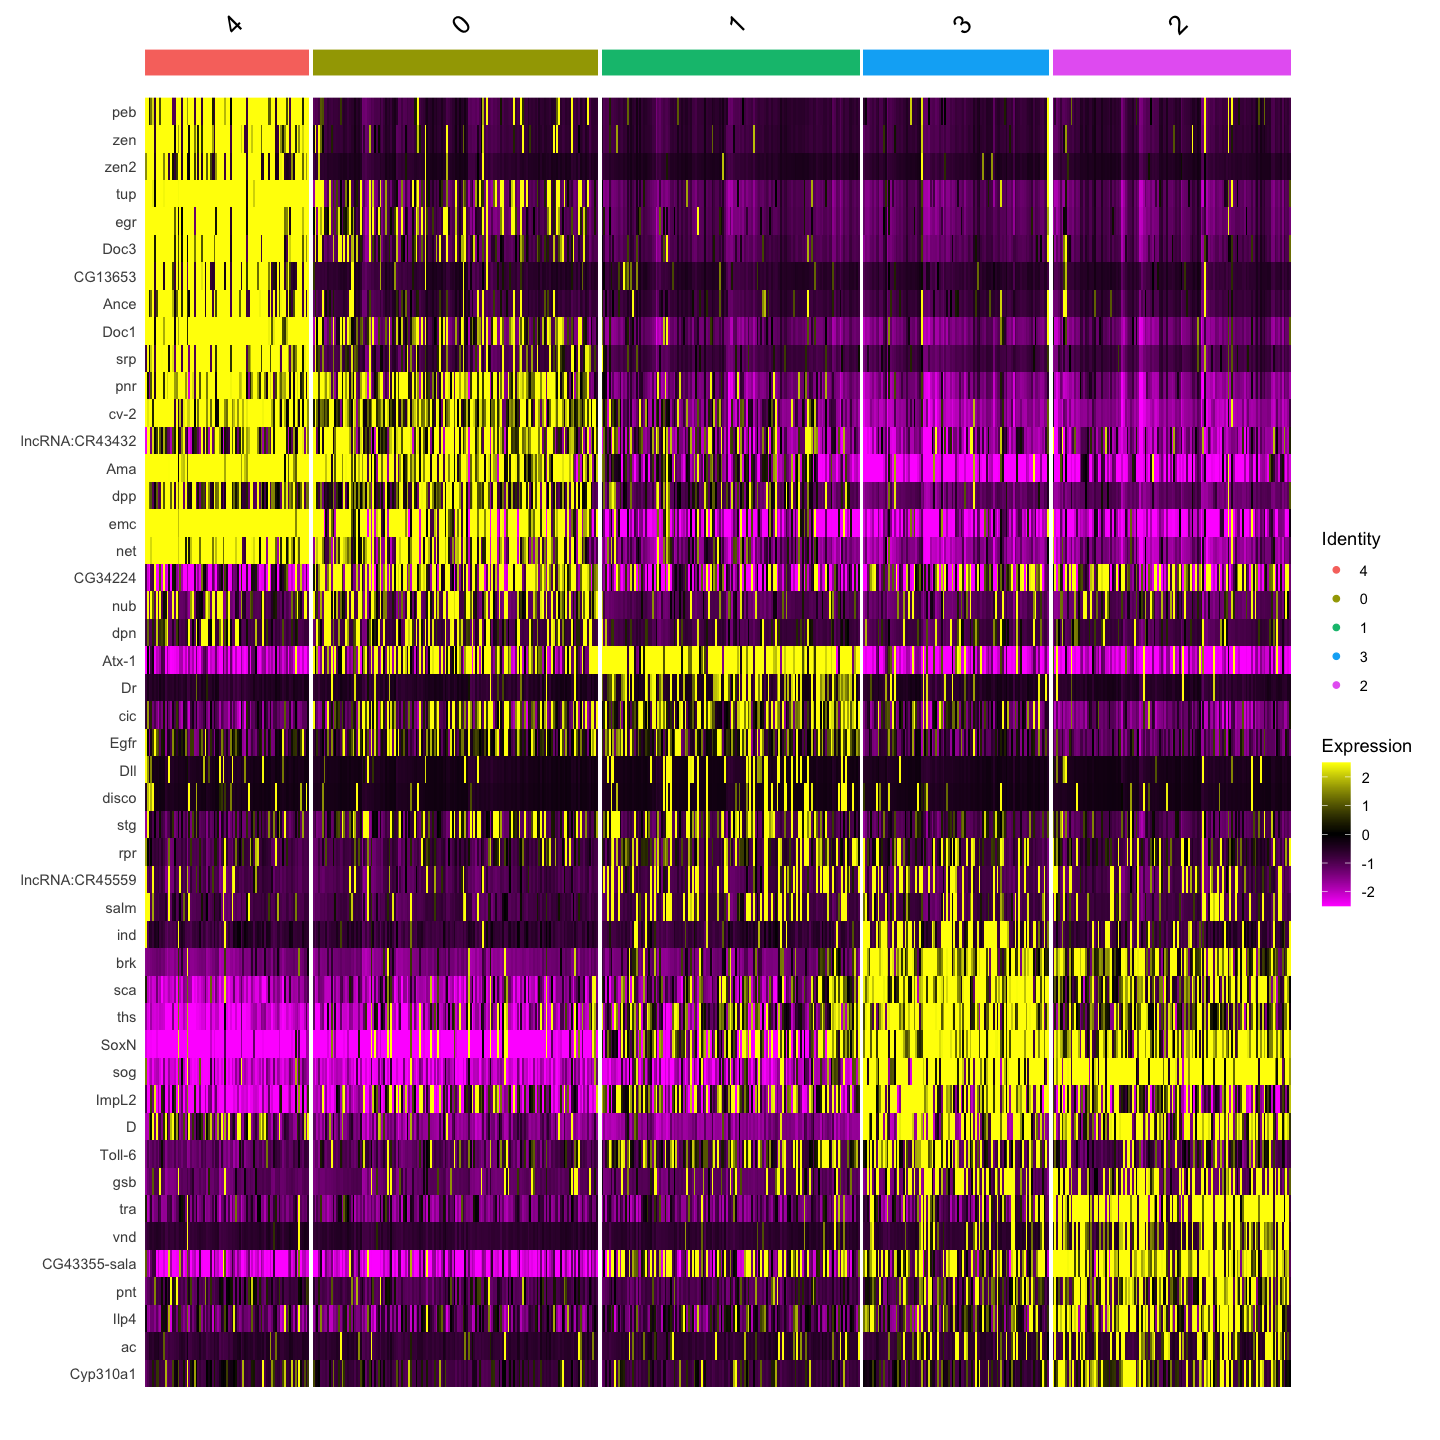

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.ecto, features = c(all.markers.top10$gene))

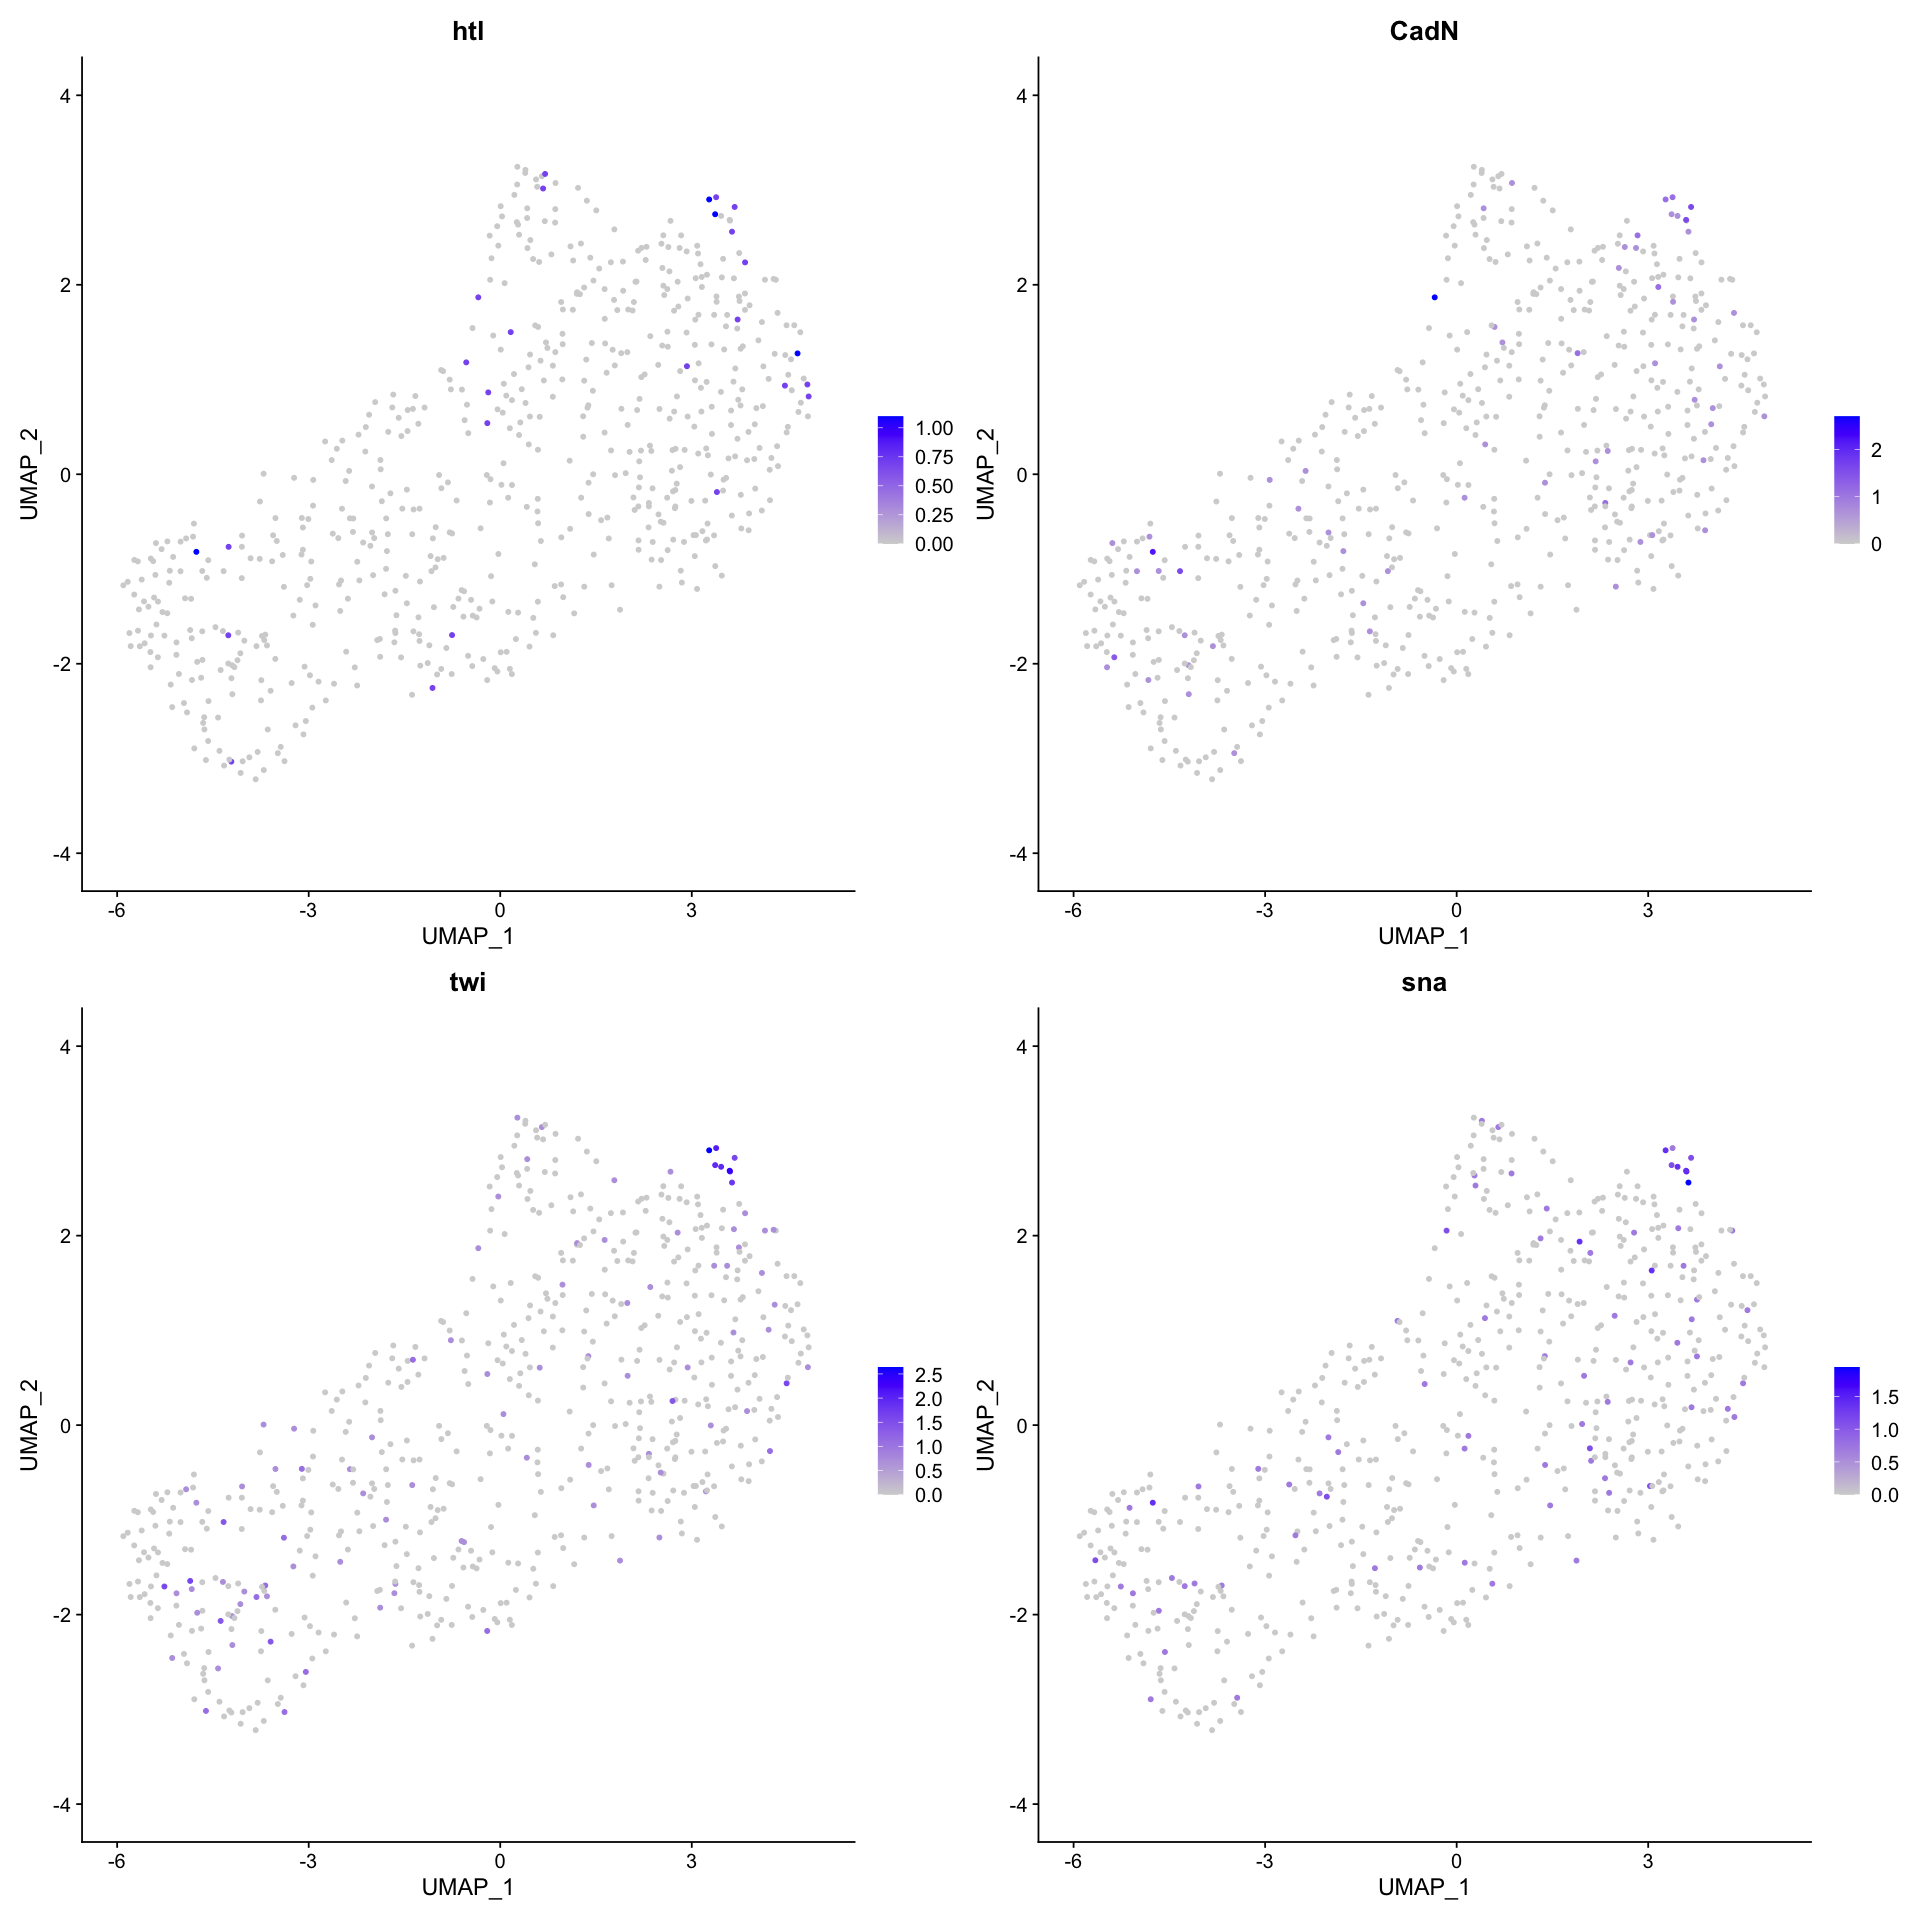

In [13]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = 'umap', features = c('htl', 'CadN','twi','sna'))

Population with mesoderm markers was detected. (doublets)

## Removing doublets

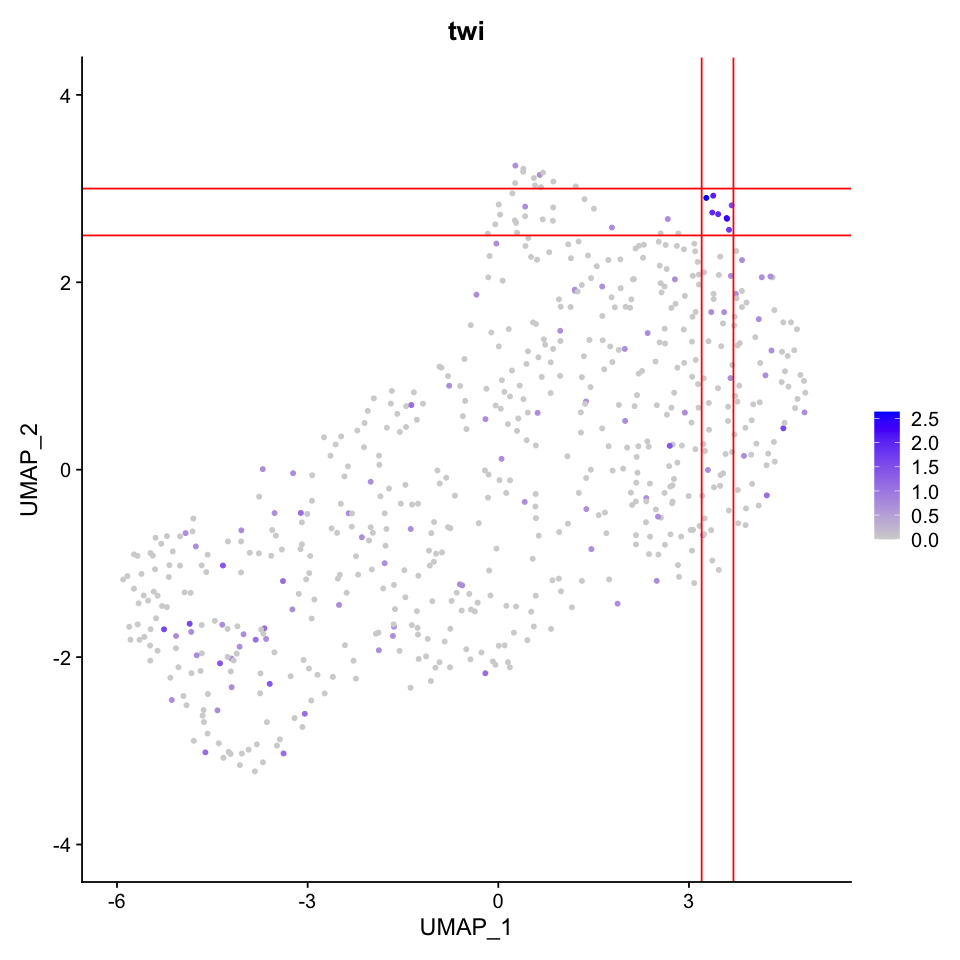

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.ecto, features = c('twi')) + 
geom_hline(yintercept=2.5, colour="red") + 
geom_hline(yintercept=3.0, colour="red") +
geom_vline(xintercept=3.2, colour="red") +
geom_vline(xintercept=3.7, colour="red")

In [15]:
umap.ecto <- as.data.frame(Embeddings(seu.ecto, reduction = 'umap'))
head(umap.ecto)

UMAP_1      UMAP_2     
GSM2494786_GTACCCATAAGA  3.36623978  2.74433105
GSM2494786_CAGAACAAACGA  0.05620682  0.95529978
GSM2494786_AGCTTACTAATC  2.76419854 -0.09910972
GSM2494786_GTACGCAATCAT -5.90341783 -1.17188699
GSM2494786_CGTTACCCTGTC  4.69990467  1.49893515
GSM2494786_TGCACCGGCCGA  1.14248847  2.25617998

In [16]:
is.doublet <- (umap.ecto$UMAP_1 > 3.2) & (umap.ecto$UMAP_1 < 3.7) & 
    (umap.ecto$UMAP_2 > 2.5) & (umap.ecto$UMAP_2 < 3.5)
sum(is.doublet)

[1] 8

In [17]:
doublet.cells <- colnames(seu.ecto)[is.doublet]
doublet.cells

[1] "GSM2494786_GTACCCATAAGA" "GSM2494786_TGGTCGTATTTC"
[3] "GSM2494788_ACTGCCTCGAAT" "GSM2494789_ATATGACATCTG"
[5] "GSM2494789_TGTGTTGTGCCG" "GSM2494785_GTGCAGAAGAGT"
[7] "GSM2494783_CCGTGCTGAACA" "GSM2494784_ATATGCTCAATG"

In [18]:
seu.doublet <- subset(seu.ecto, cells = doublet.cells)
seu.doublet$manual_ID <- 'doublet'
seu.doublet
seu.ecto <- subset(seu.ecto, cells = doublet.cells, invert = T)
seu.ecto

An object of class Seurat 
22816 features across 8 samples within 2 assays 
Active assay: SCT (8695 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
22816 features across 619 samples within 2 assays 
Active assay: SCT (8695 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

## Clustering again without doublets

PC_ 1 
Positive:  SoxN, CG43355-sala, sog, ths, sca, Cys, brk, ImpL2, Pino, tra 
	   slp1, rdx, gsb, Dl, Ilp4, noc, sad, Toll-6, mid, cact 
	   HnRNP-K, CG5059, path, Obp99a, CG42662-CG30080, lok, aay, phyl, vnd, RnrS 
Negative:  emc, Ama, Dtg, Doc1, net, tup, cv-2, egr, Nrt, CG45263 
	   Z600, pnr, mirr, phu, CG12420, Doc3, kek1, hbs, Doc2, CG14915 
	   SNCF, CG14427, MFS14, srp, bun, Svil, rho, ush, peb, zen 
PC_ 2 
Positive:  RpS20, RpLP1, RpS29, RpS26, RpL27A, CG12420, CG14915, RpS3A, RpL15, RpS15 
	   RpLP2, RpL21, RpL10, RpL37a, RpL37A, RpS16, RpS18, RpS8, RpLP0, RpS25 
	   lncRNA:CR43887, Doc2, RpL27, RpL41, Z600, Ama, Tctp, SNCF, Doc3, CG8960 
Negative:  hth, wech, Imp-CR45204, Dl, Trf2, fs(1)h, ths, SoxN, wb, E2f1 
	   kis, CG9821, zld, Antp, fax, N, nmo, sdt, ed, Ppa 
	   sca, Sxl, spen, l(3)neo38, pre-lola-G-lola, lncRNA:roX1, sqd, mt:CoI, aop, pAbp 
PC_ 3 
Positive:  sog, D, rho, scyl, toc, tra, CG43355-sala, chrb, vn, brk 
	   SoxN, sca, fend, E(spl)m5-HLH, peb, Ilp4, esg,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 619
Number of edges: 27461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5737
Number of communities: 4
Elapsed time: 0 seconds


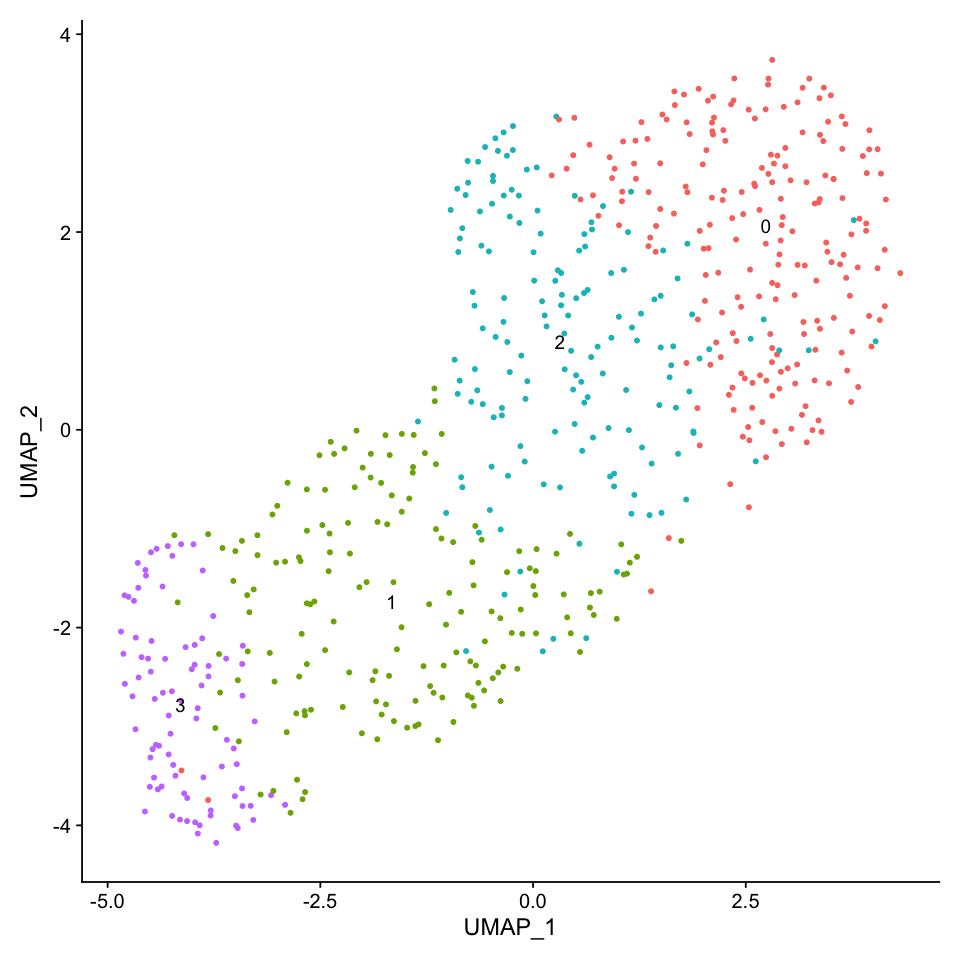

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
seu.ecto <- RunPCA(seu.ecto)
seu.ecto <- RunUMAP(seu.ecto, dims = 1:30)
seu.ecto <- FindNeighbors(seu.ecto, dims = 1:30)
seu.ecto <- FindClusters(seu.ecto)
DimPlot(seu.ecto, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 619
Number of edges: 27461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4554
Number of communities: 6
Elapsed time: 0 seconds


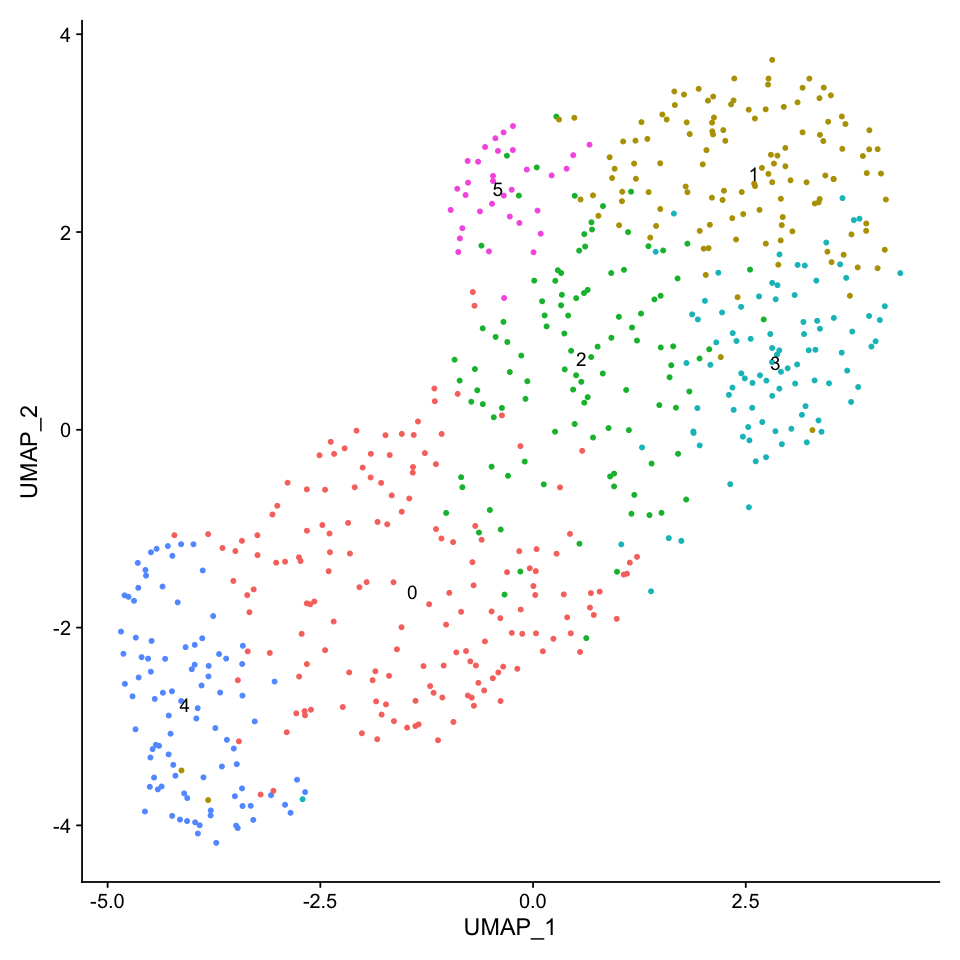

In [20]:
seu.ecto <- FindClusters(seu.ecto, resolution = 1.3)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', label = T) + NoLegend()

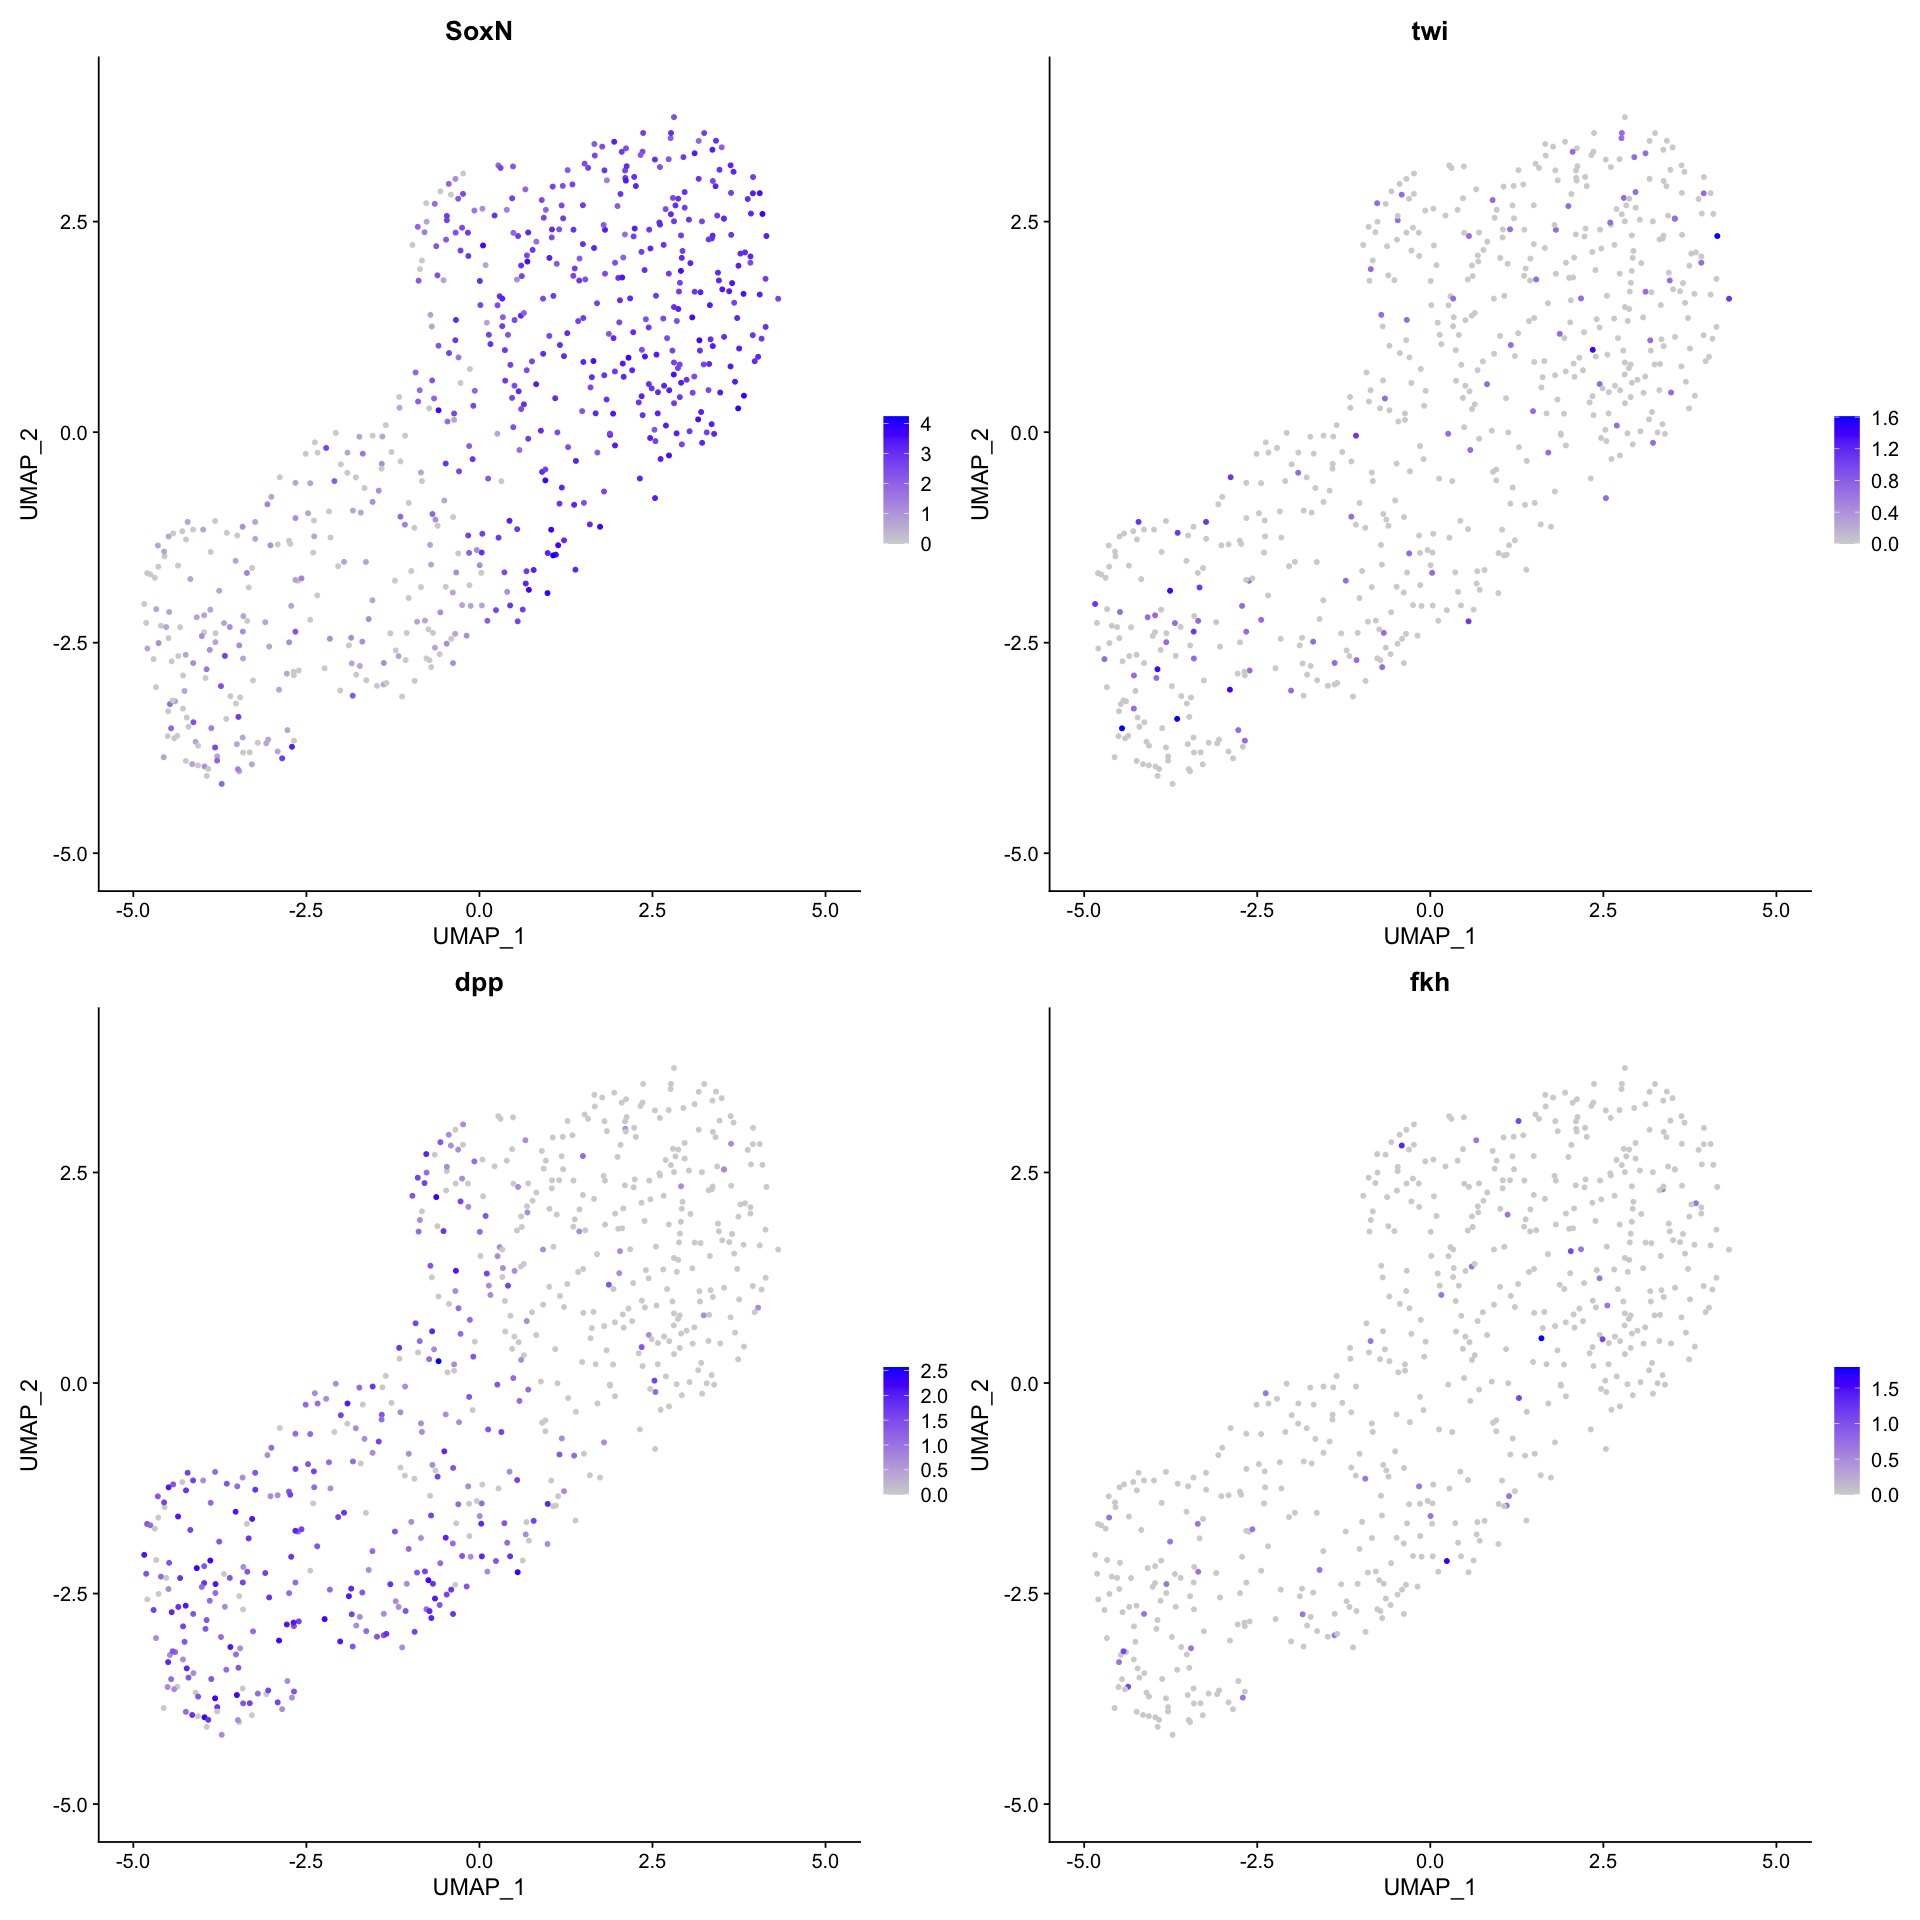

In [21]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = 'umap', features = c('SoxN', 'twi','dpp','fkh'))

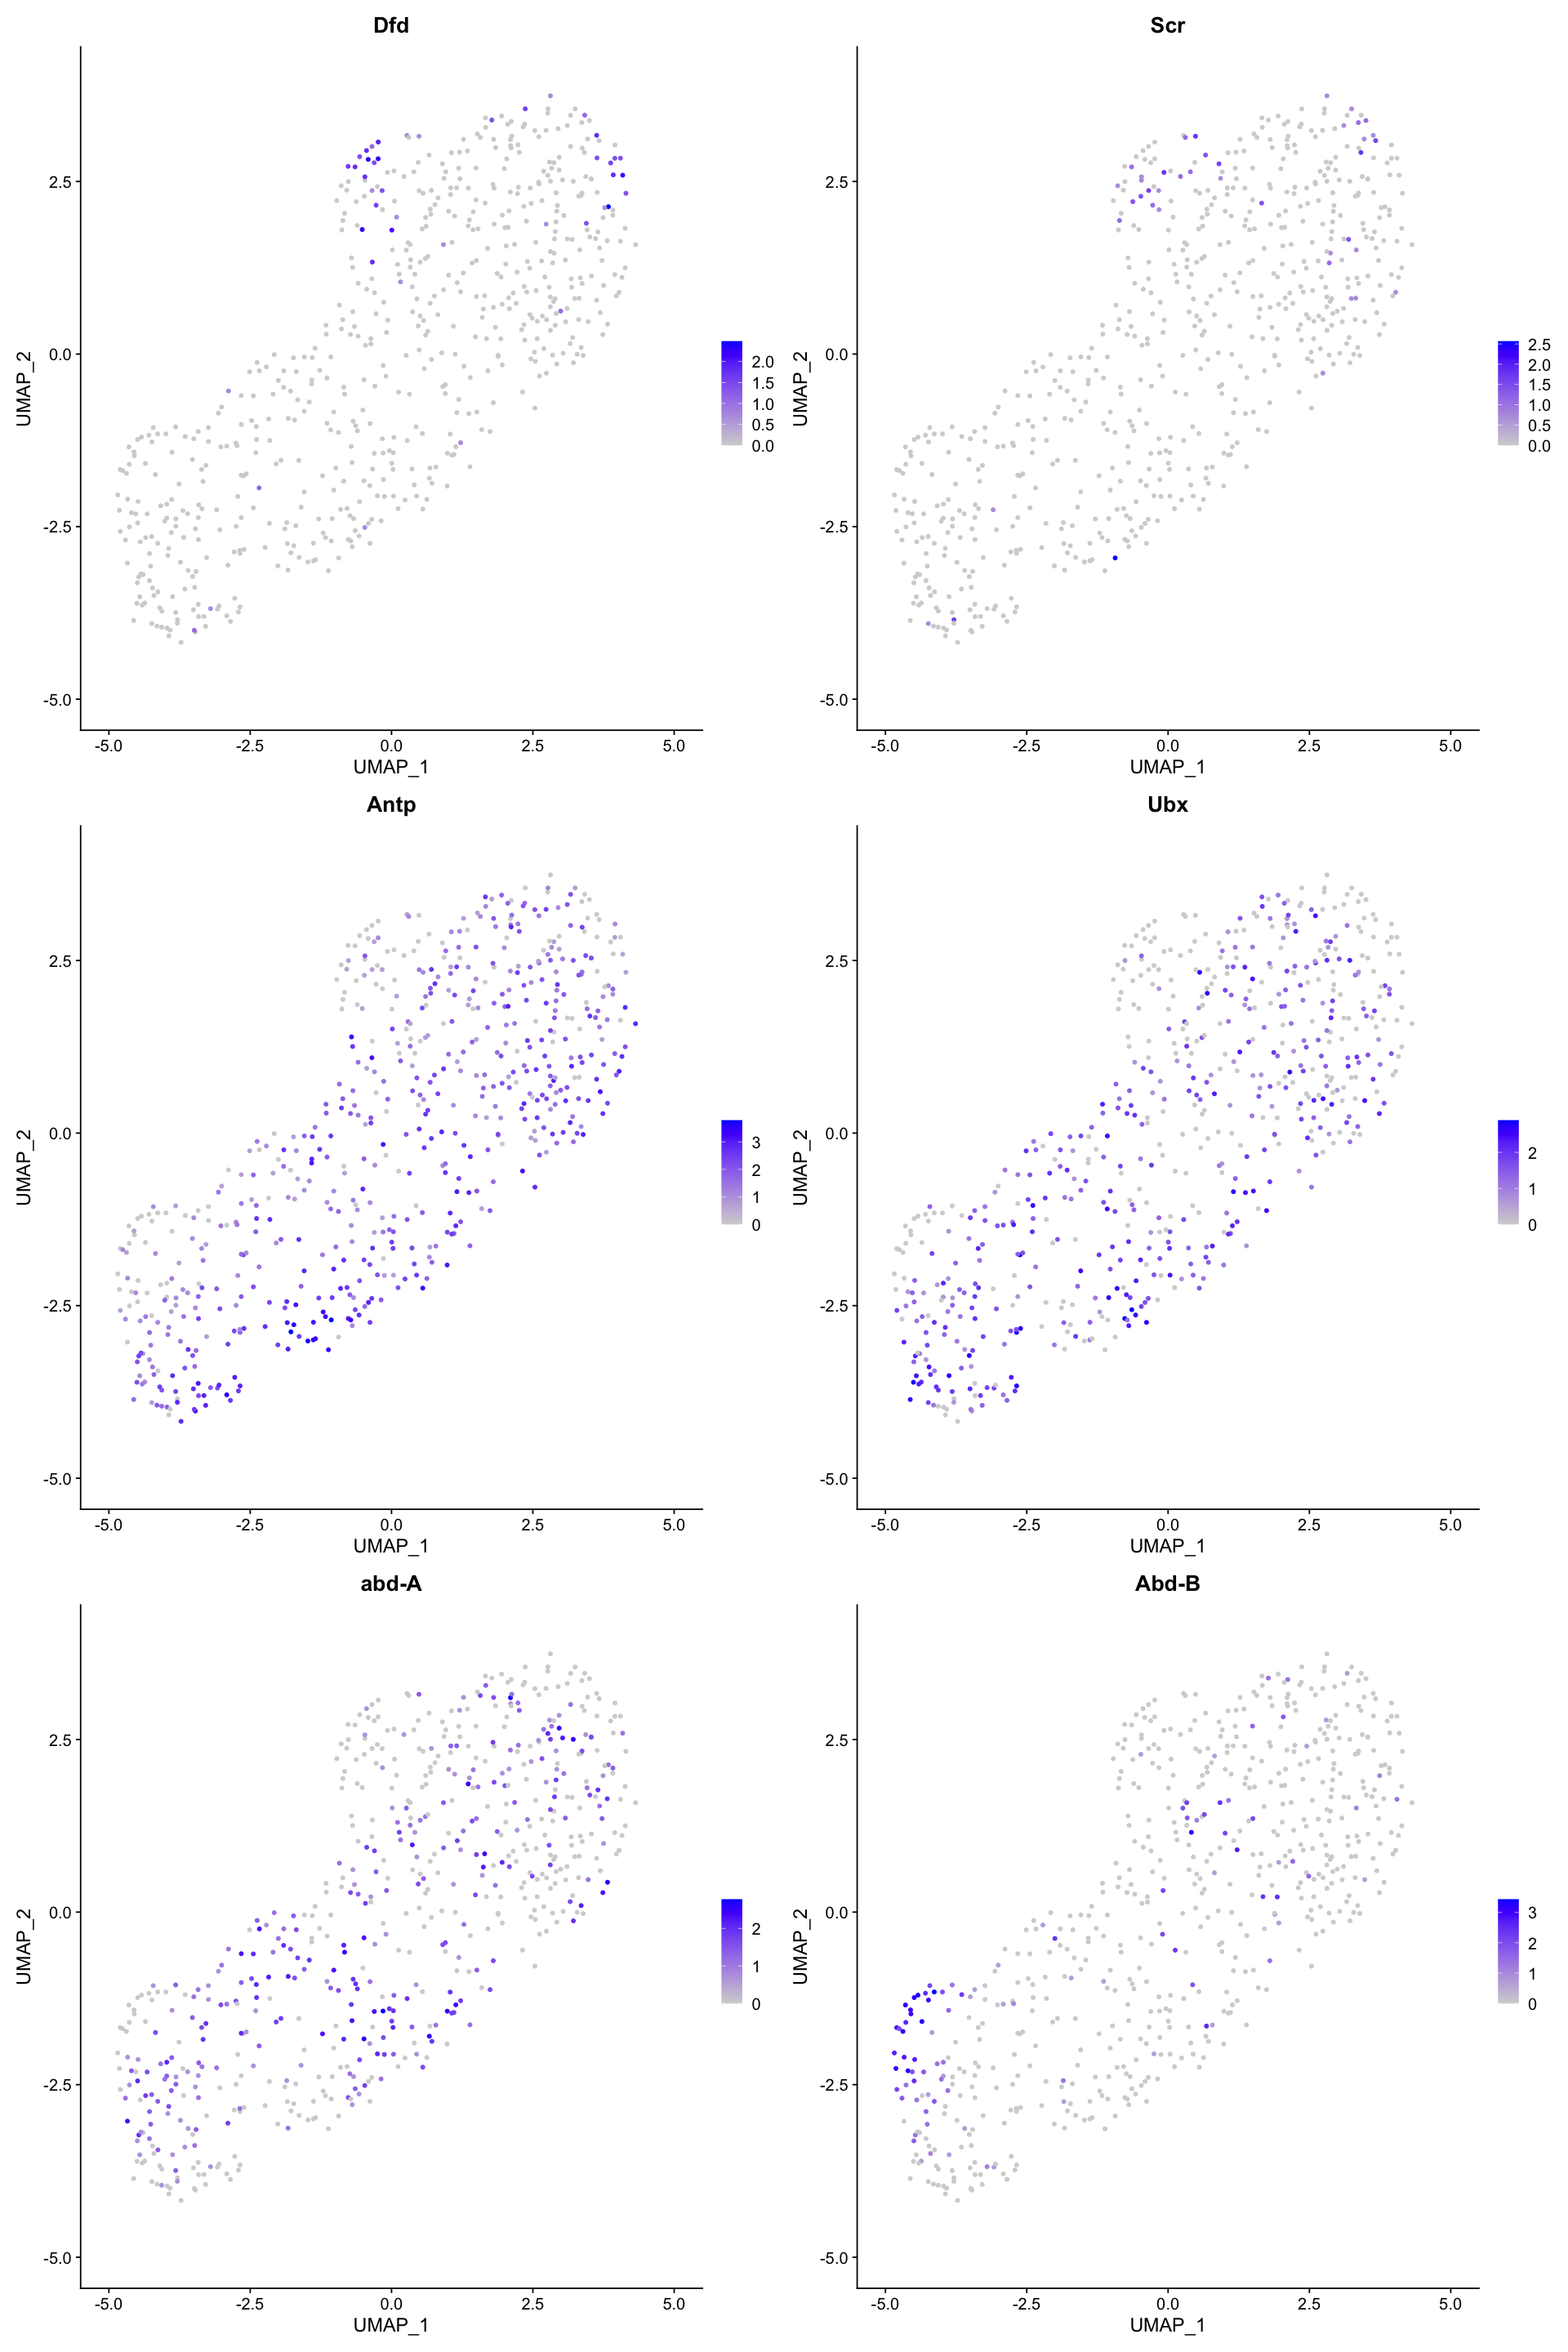

In [22]:
options(repr.plot.width=16, repr.plot.height=24)
FeaturePlot(seu.ecto, reduction = 'umap', features = c('Dfd', 'Scr','Antp','Ubx','abd-A','Abd-B'))

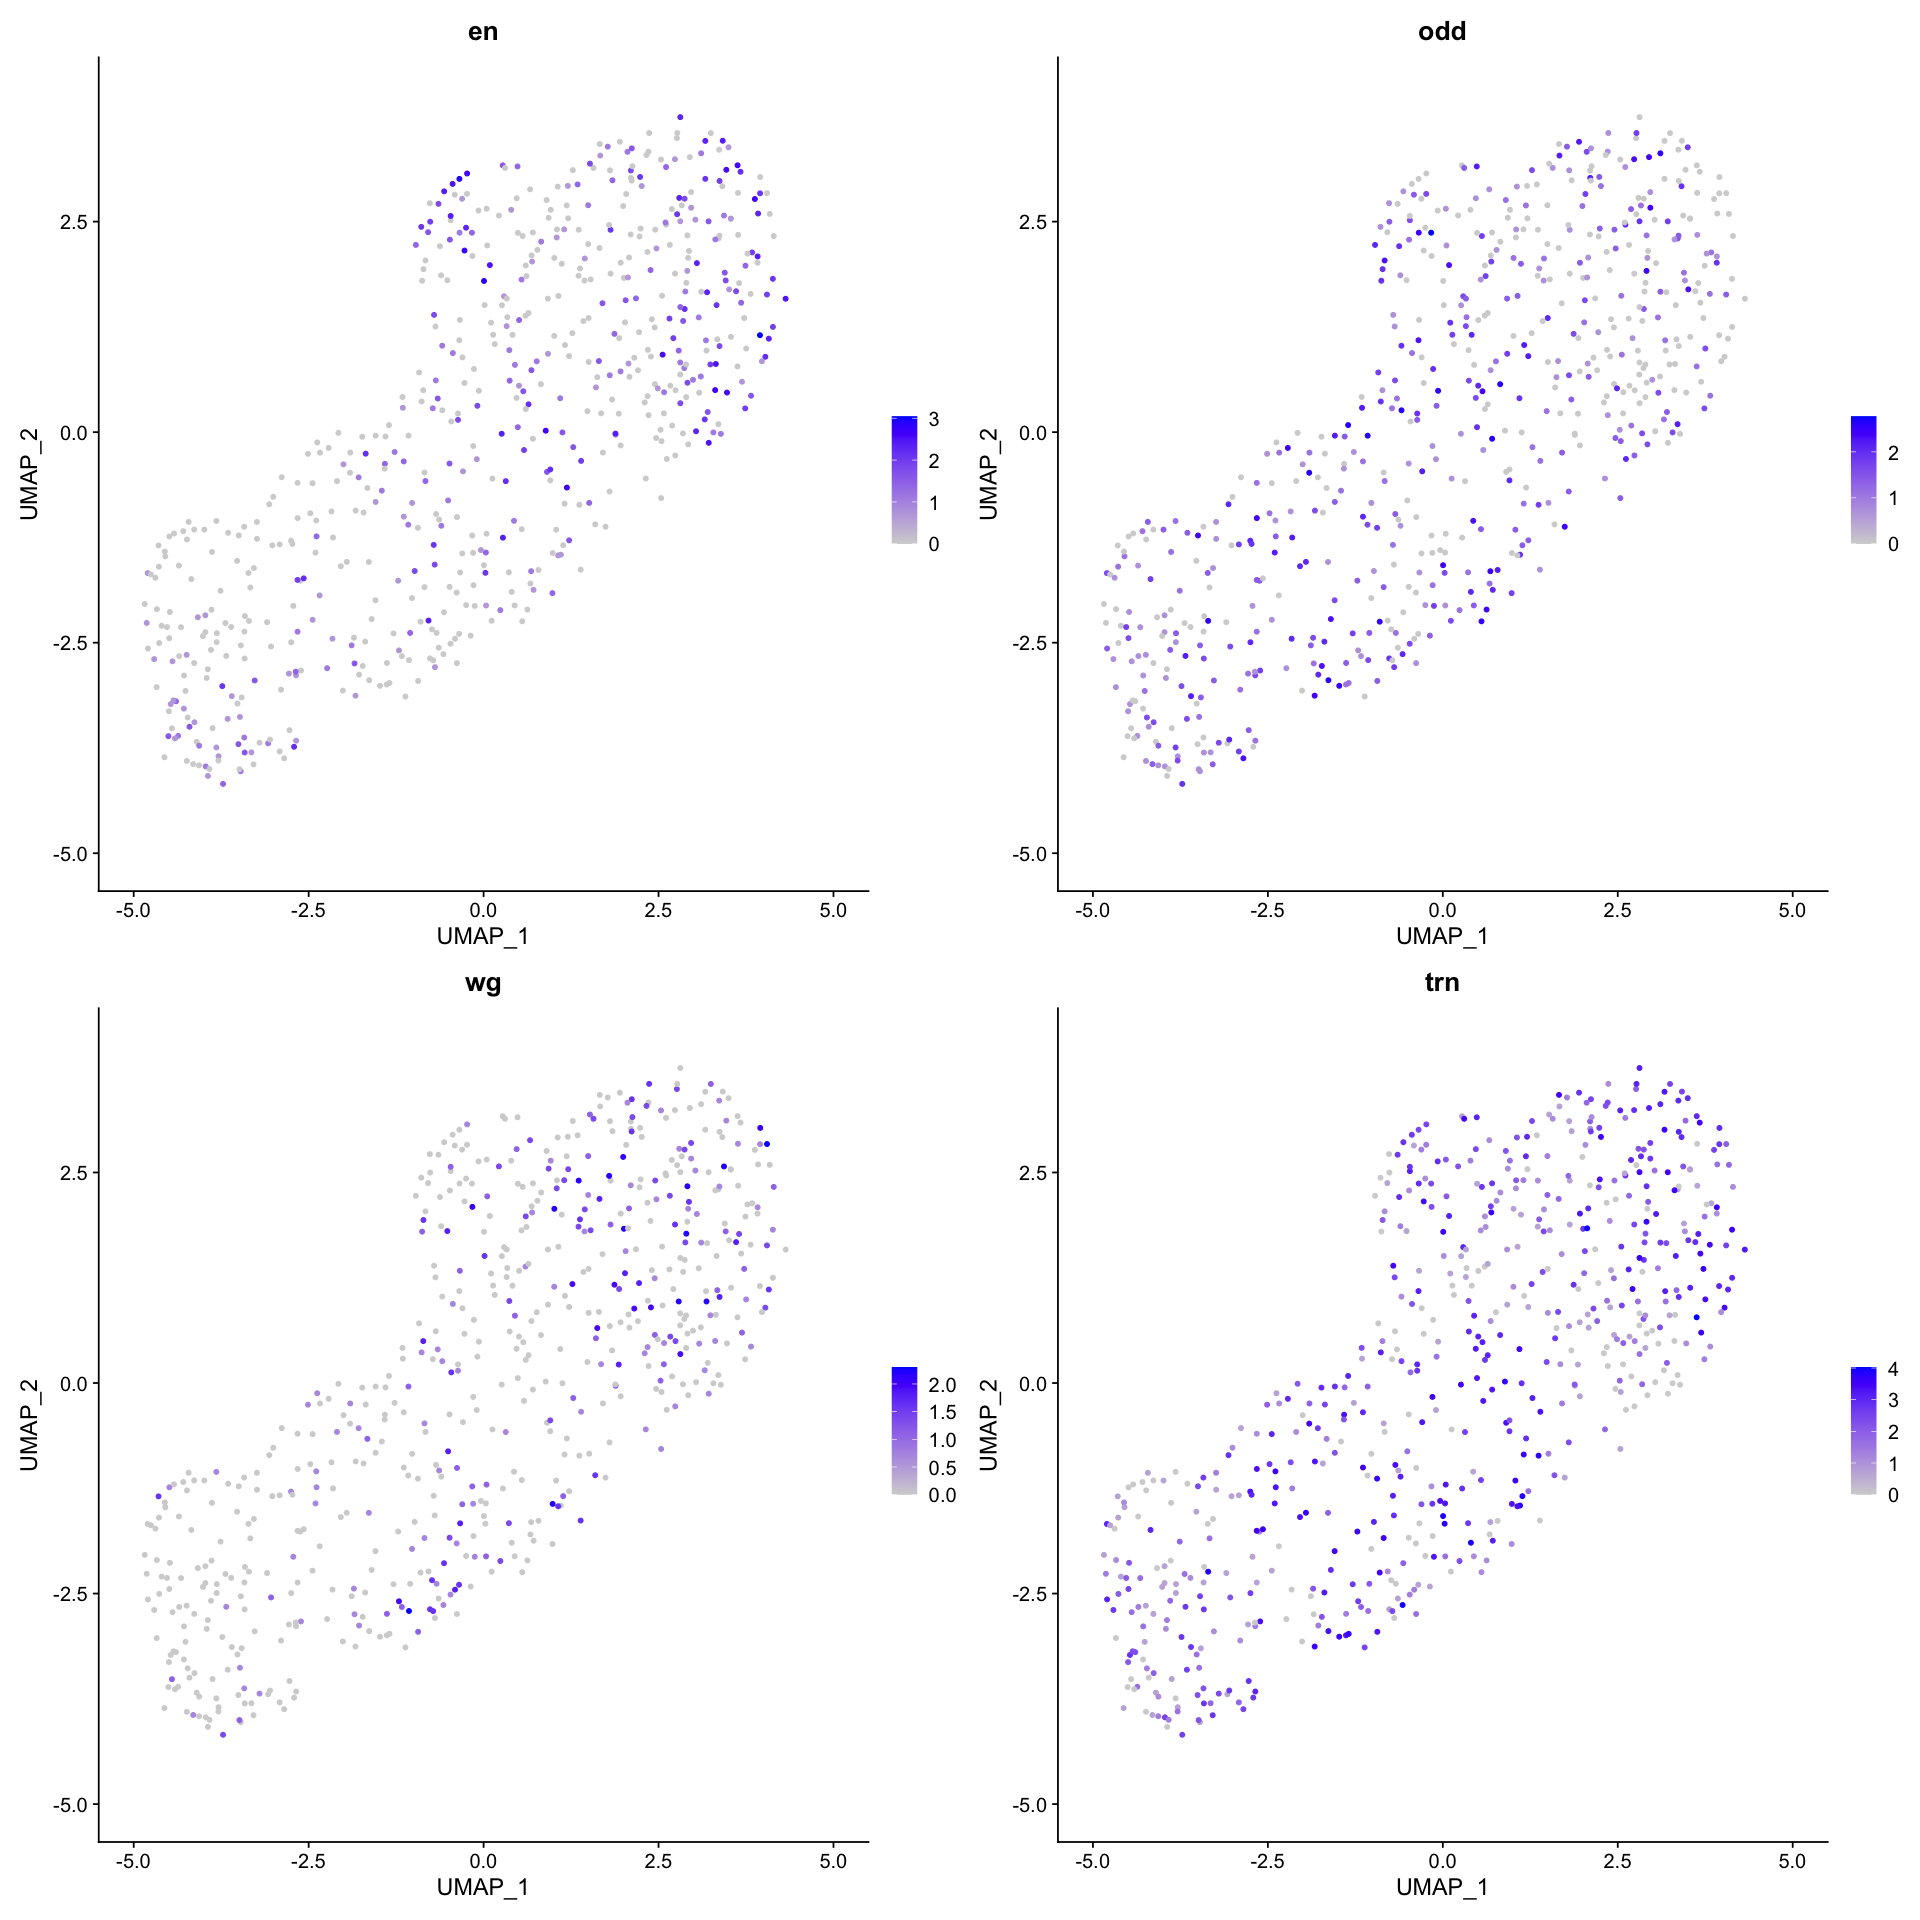

In [23]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = 'umap', features = c('en', 'odd','wg','trn'))

trn+/trn- cells were mixed.

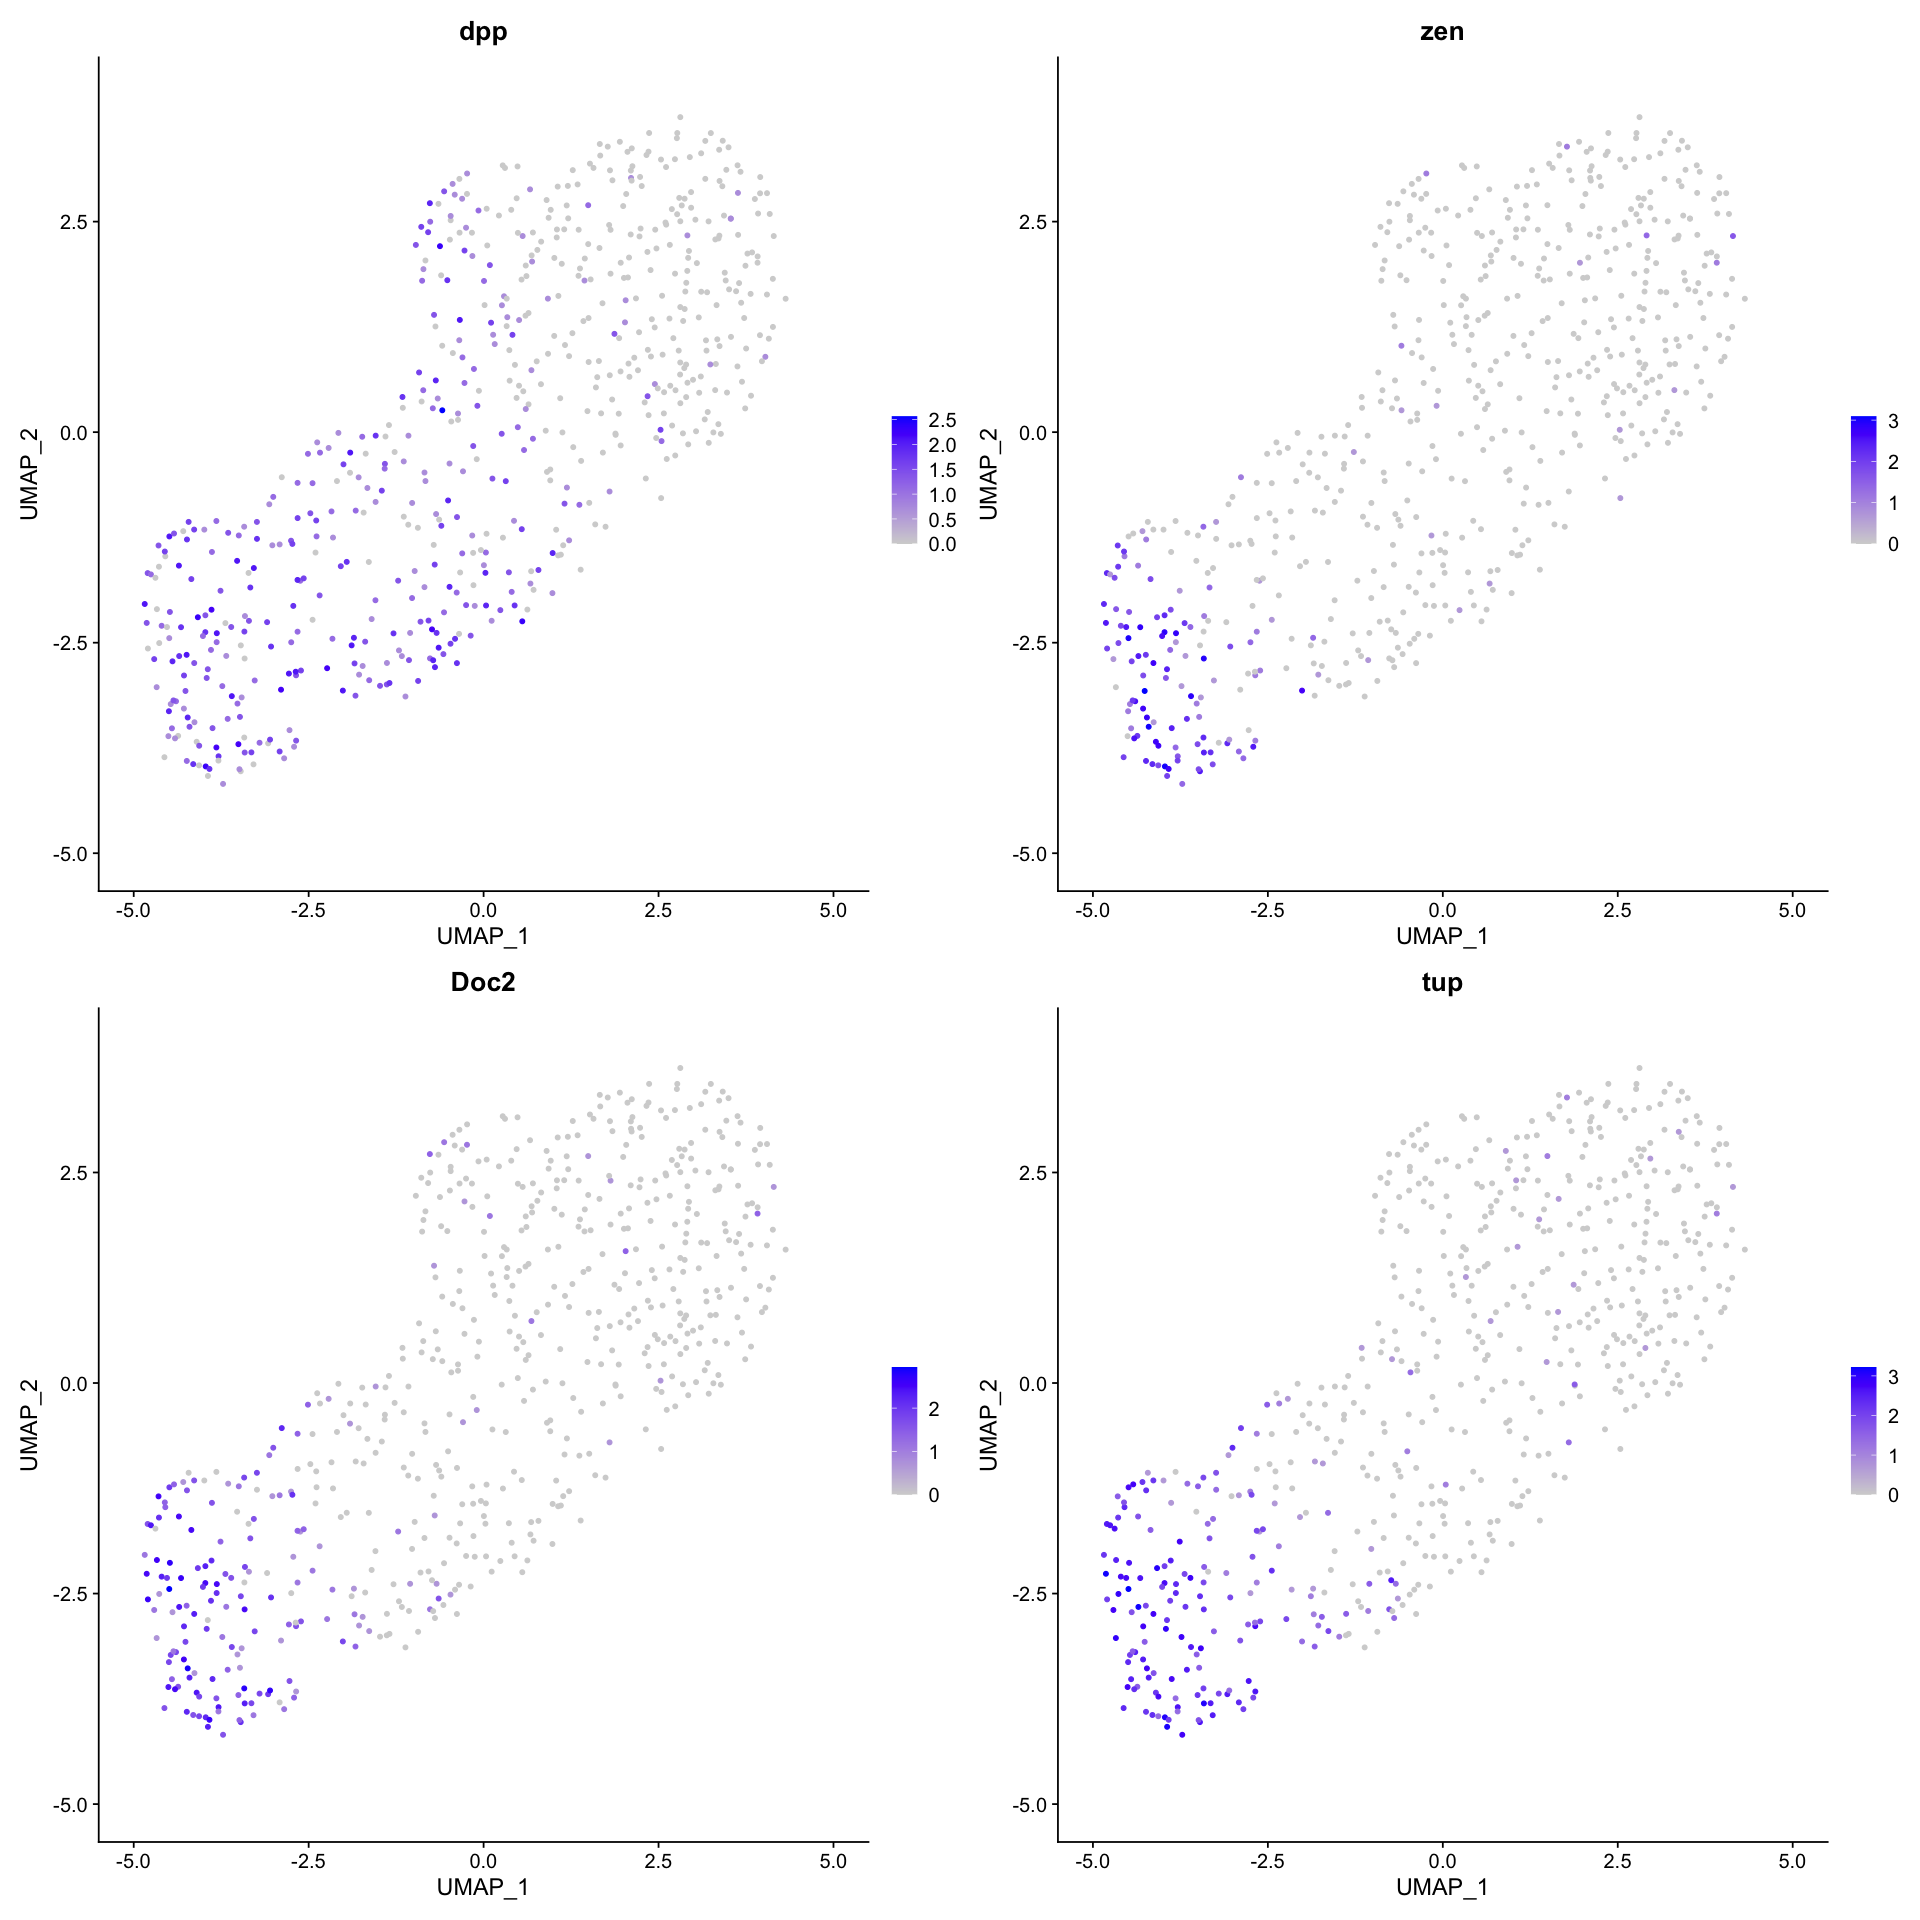

In [24]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = 'umap', features = c('dpp','zen','Doc2','tup'))

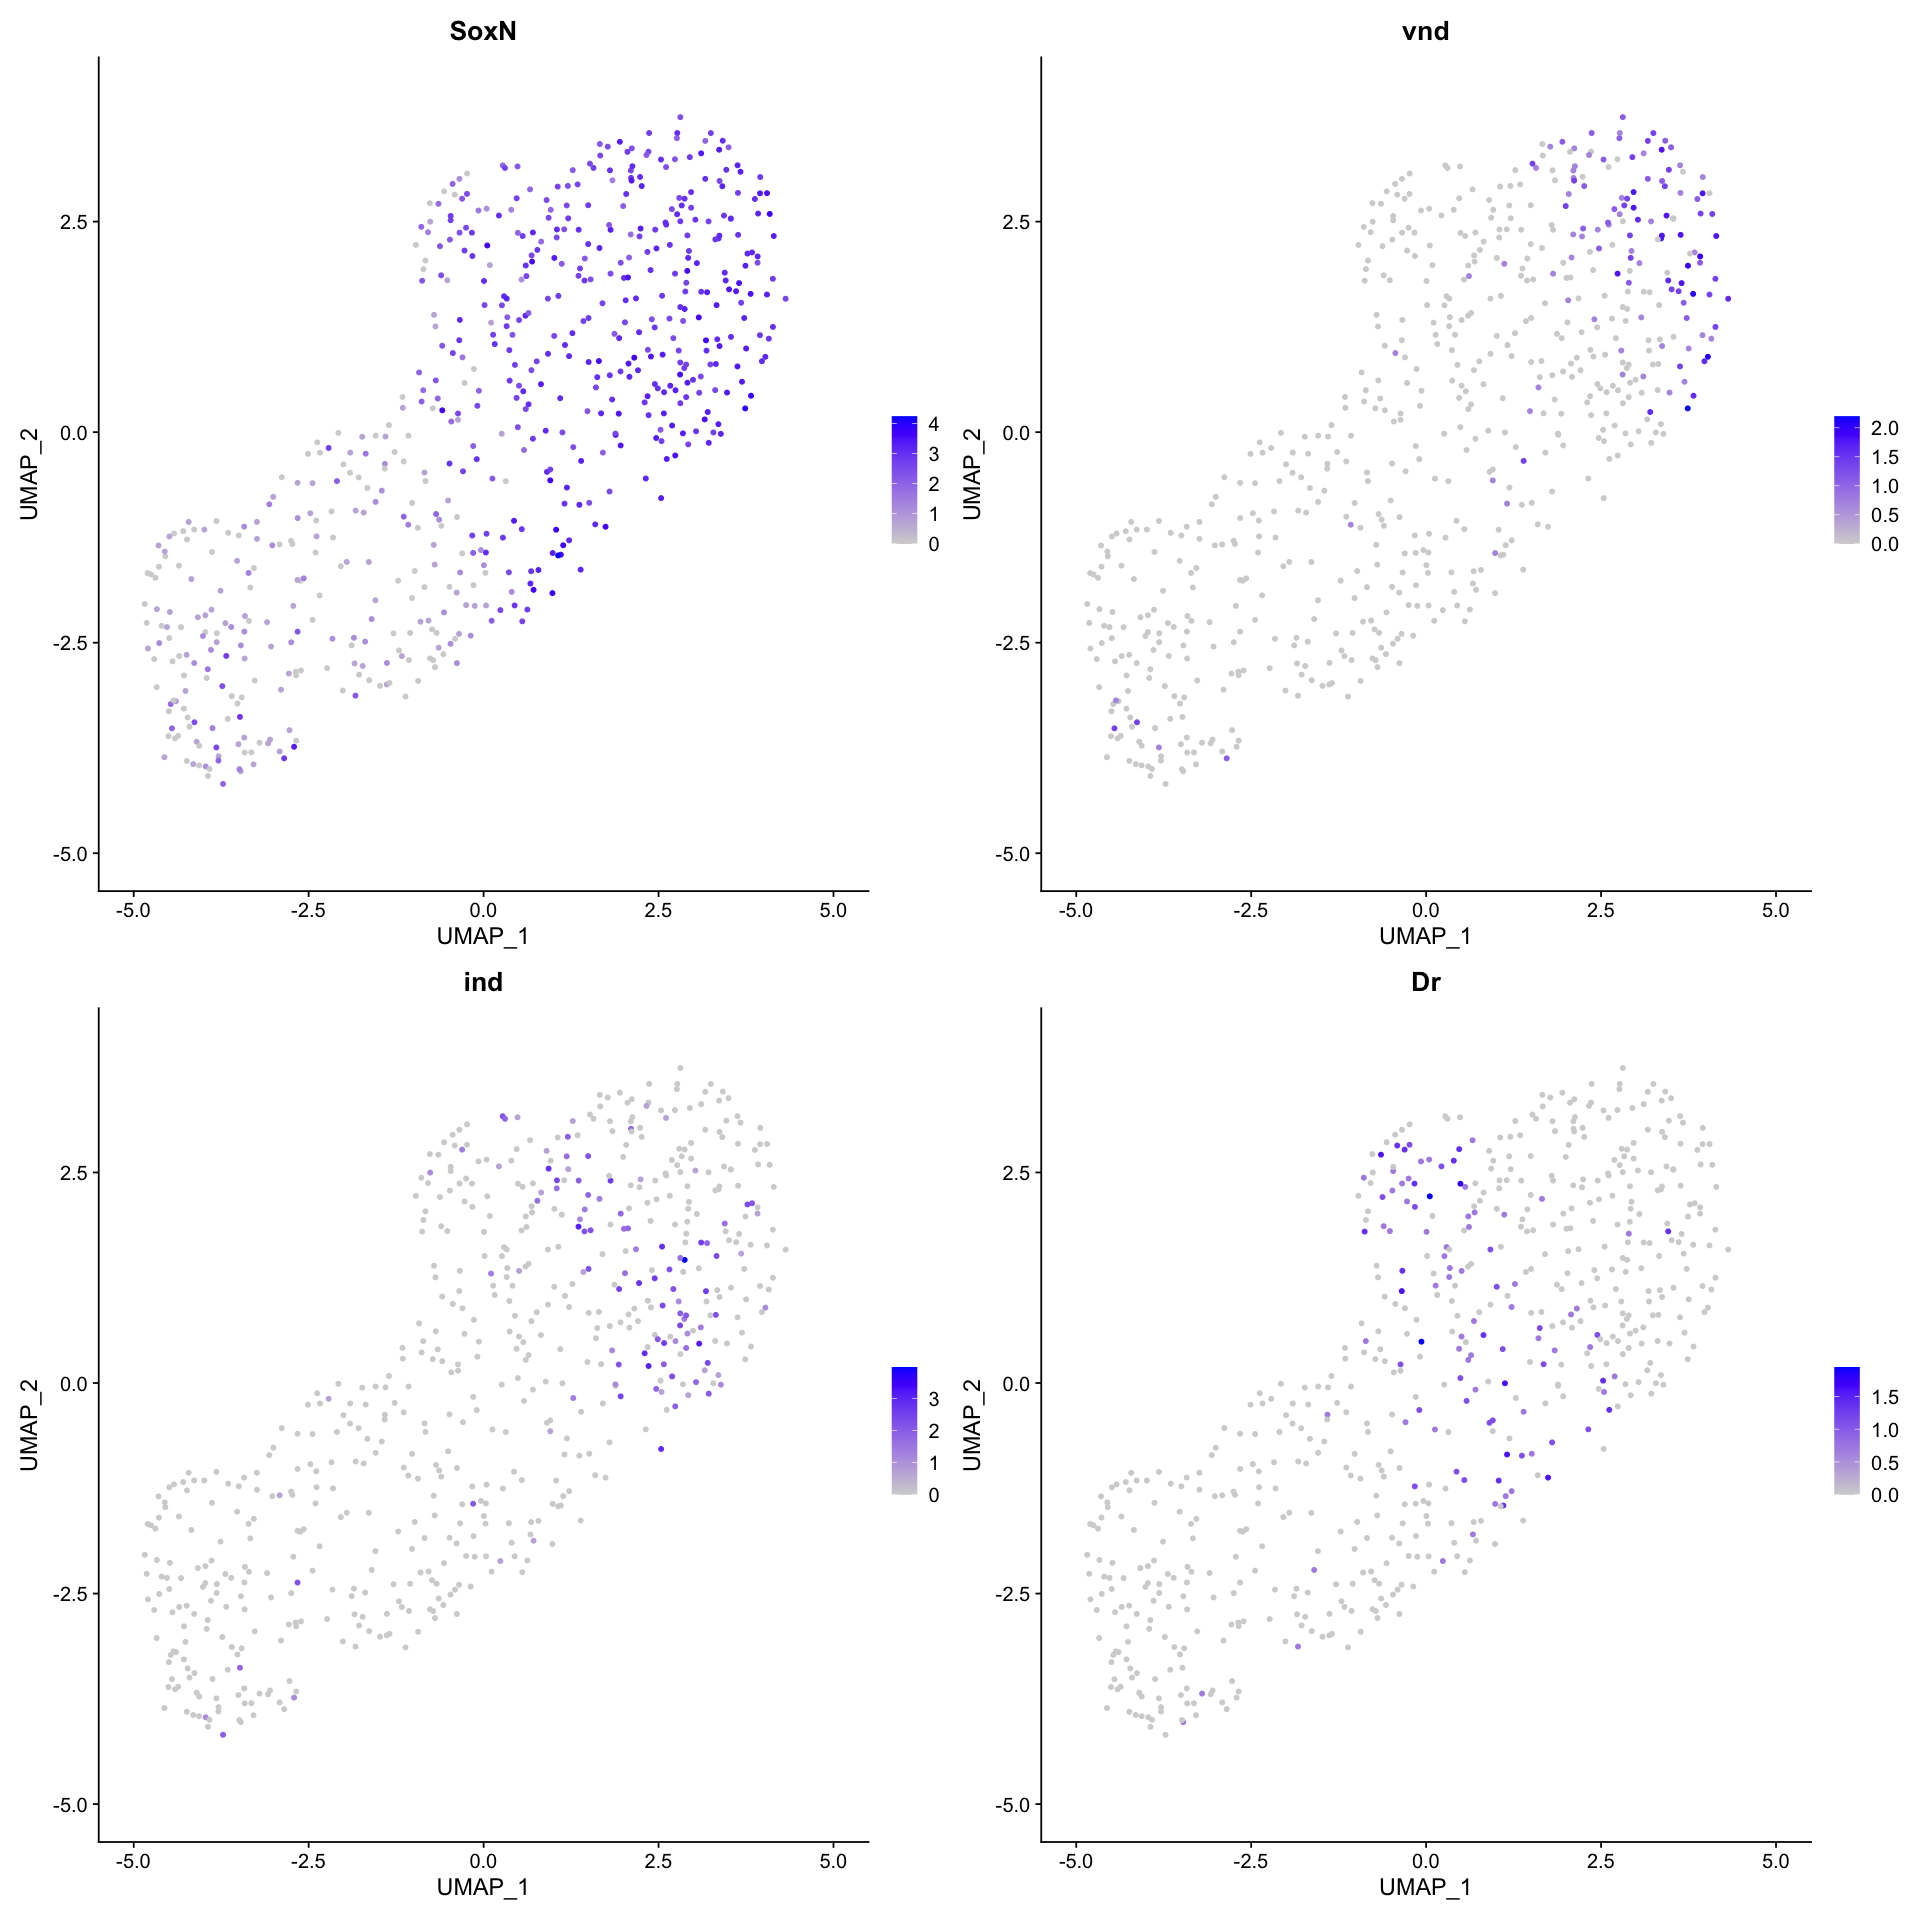

In [25]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = 'umap', features = c('SoxN','vnd','ind','Dr'))

ventral part of PS1-2 were mixed to more posterior cells

## AP annotation

manual_ID
GSM2494786_CAGAACAAACGA 2        
GSM2494786_AGCTTACTAATC 3        
GSM2494786_GTACGCAATCAT 4        
GSM2494786_CGTTACCCTGTC 1        
GSM2494786_TGCACCGGCCGA 5        
GSM2494786_ATGGACTTCAAA 1

manual_ID  
GSM2494786_CAGAACAAACGA trunk      
GSM2494786_AGCTTACTAATC trunk      
GSM2494786_GTACGCAATCAT amnioserosa
GSM2494786_CGTTACCCTGTC trunk      
GSM2494786_TGCACCGGCCGA trunk      
GSM2494786_ATGGACTTCAAA trunk

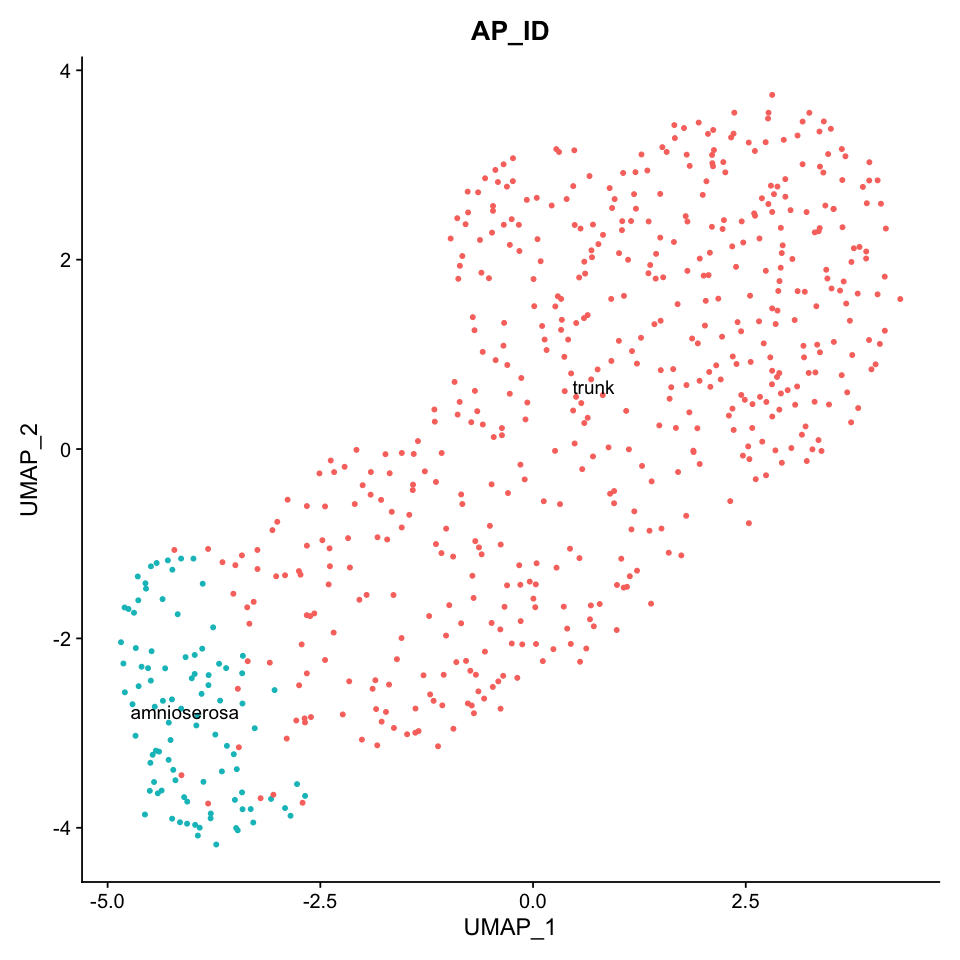

In [26]:
manual_id <- as.data.frame(seu.ecto$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                "0" = "trunk", 
                                "1" = "trunk", 
                                "2" = "trunk", 
                                "3" = "trunk", 
                                "4" = "amnioserosa",
                                "5" = "trunk")
head(manual_id)

seu.ecto$AP_ID <- manual_id$manual_ID
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', label = TRUE, group.by = 'AP_ID') + NoLegend()

## DV-annotation

In [27]:
DV_genes <- c("rho", "vnd", "pnt", "ind", "sog", "SoxN", "brk", "dpp", "Egfr", "vn", "pnt",
              "Atx-1", "egr", "cv-2", "Doc1", "Ance", "Dr", "emc", "cic",
              "mirr", "ush", "Ama", "bbg", "tup", "zen", "Doc2", "Z600", "C15", "peb",
             "Dtg", "CG13653", "Doc3", "dap","srp", "stg")

In [28]:
norm.count.ecto <- GetAssayData(seu.ecto)
norm.count.ecto.dv.genes <- as.matrix(norm.count.ecto[DV_genes,])
head(norm.count.ecto.dv.genes)

GSM2494786_CAGAACAAACGA GSM2494786_AGCTTACTAATC GSM2494786_GTACGCAATCAT
rho  1.791759                0.000000                2.302585               
vnd  0.000000                0.000000                0.000000               
pnt  0.000000                0.000000                0.000000               
ind  0.000000                3.135494                1.098612               
sog  0.000000                3.044522                2.197225               
SoxN 2.484907                2.639057                1.098612               
     GSM2494786_CGTTACCCTGTC GSM2494786_TGCACCGGCCGA GSM2494786_ATGGACTTCAAA
rho  1.386294                0.000000                2.708050               
vnd  1.386294                0.000000                1.791759               
pnt  2.079442                0.000000                1.098612               
ind  0.000000                0.000000                0.000000               
sog  3.295837                2.197225                3.295837               
SoxN 2.995732                2.708050                3.091042               
     GSM2494786_CAGTACGCAAAT GSM2494786_GCGCTCGACAGC GSM2494786_TTTGACGCACTC
rho  2.564949                1.791759                0                      
vnd  1.791759                1.098612                0                      
pnt  0.000000                1.386294                0                      
ind  0.000000                0.000000                0                      
sog  3.761200                2.708050                0                      
SoxN 2.833213                2.397895                0                      
     GSM2494786_AGTTGCACGAAA ⋯ GSM2494784_CAACGAAGCAAT GSM2494784_TAGTTCCGTCAG
rho  0.0000000               ⋯ 0.0000000               0.000000               
vnd  0.0000000               ⋯ 0.0000000               0.000000               
pnt  0.0000000               ⋯ 0.0000000               0.000000               
ind  0.0000000               ⋯ 0.6931472               0.000000               
sog  0.0000000               ⋯ 2.1972246               2.197225               
SoxN 0.6931472               ⋯ 2.6390573               3.091042               
     GSM2494784_TGCGCTGTAGCC GSM2494784_TTTATATAAACN GSM2494784_CCCTGTTTTCAA
rho  0.0000000               0.000000                0.000000               
vnd  0.0000000               0.000000                0.000000               
pnt  0.0000000               0.000000                0.000000               
ind  0.0000000               0.000000                0.000000               
sog  0.6931472               2.302585                1.098612               
SoxN 2.0794415               2.708050                0.000000               
     GSM2494784_TCGTACCTTAGT GSM2494784_CATCTTGCTCTA GSM2494784_TAAAGTGCCCAA
rho  0.000000                1.7917595               0.000000               
vnd  0.000000                0.0000000               0.000000               
pnt  0.000000                0.6931472               0.000000               
ind  0.000000                0.0000000               2.079442               
sog  2.397895                0.6931472               1.791759               
SoxN 3.091042                1.3862944               2.639057               
     GSM2494784_CAAGCGGGTAAT GSM2494784_CTTCATAGGAGT
rho  0.000000                1.791759               
vnd  0.000000                0.000000               
pnt  0.000000                0.000000               
ind  0.000000                1.098612               
sog  1.609438                2.890372               
SoxN 3.218876                3.332205

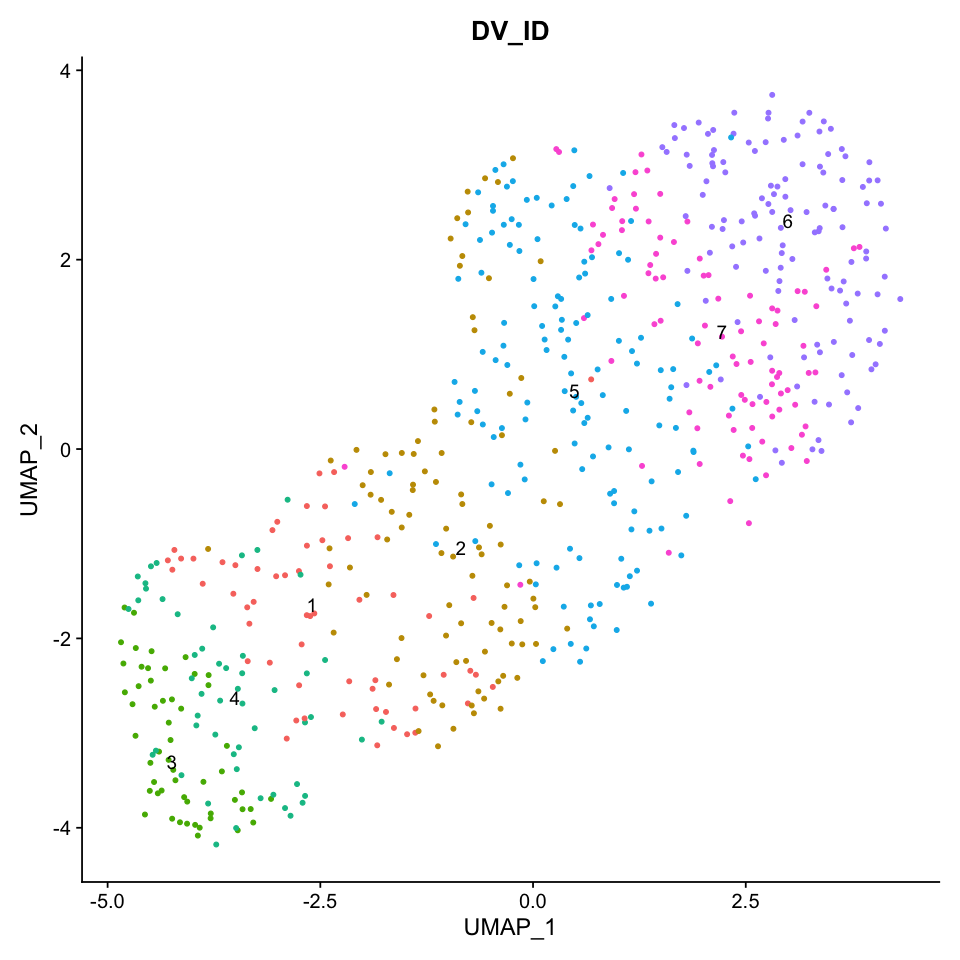

In [29]:
set.seed(5)
trunk_ect_DV_cluster <- kmeans(x=t(norm.count.ecto.dv.genes), centers=7)
seu.ecto$DV_ID <- trunk_ect_DV_cluster$cluster
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'DV_ID',label = TRUE) + NoLegend()

In [30]:
Idents(seu.ecto) <- 'DV_ID'
levels(seu.ecto) <- c(6,7,5,2,1,4,3)
all.markers.ecto <- FindAllMarkers(object = seu.ecto, only.pos = TRUE)
nrow(all.markers.ecto)
all.markers.ecto.top10 <- all.markers.ecto %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.ecto.top10)

Calculating cluster 6

Calculating cluster 7

Calculating cluster 5

Calculating cluster 2

Calculating cluster 1

Calculating cluster 4

Calculating cluster 3



[1] 600

[1] 70

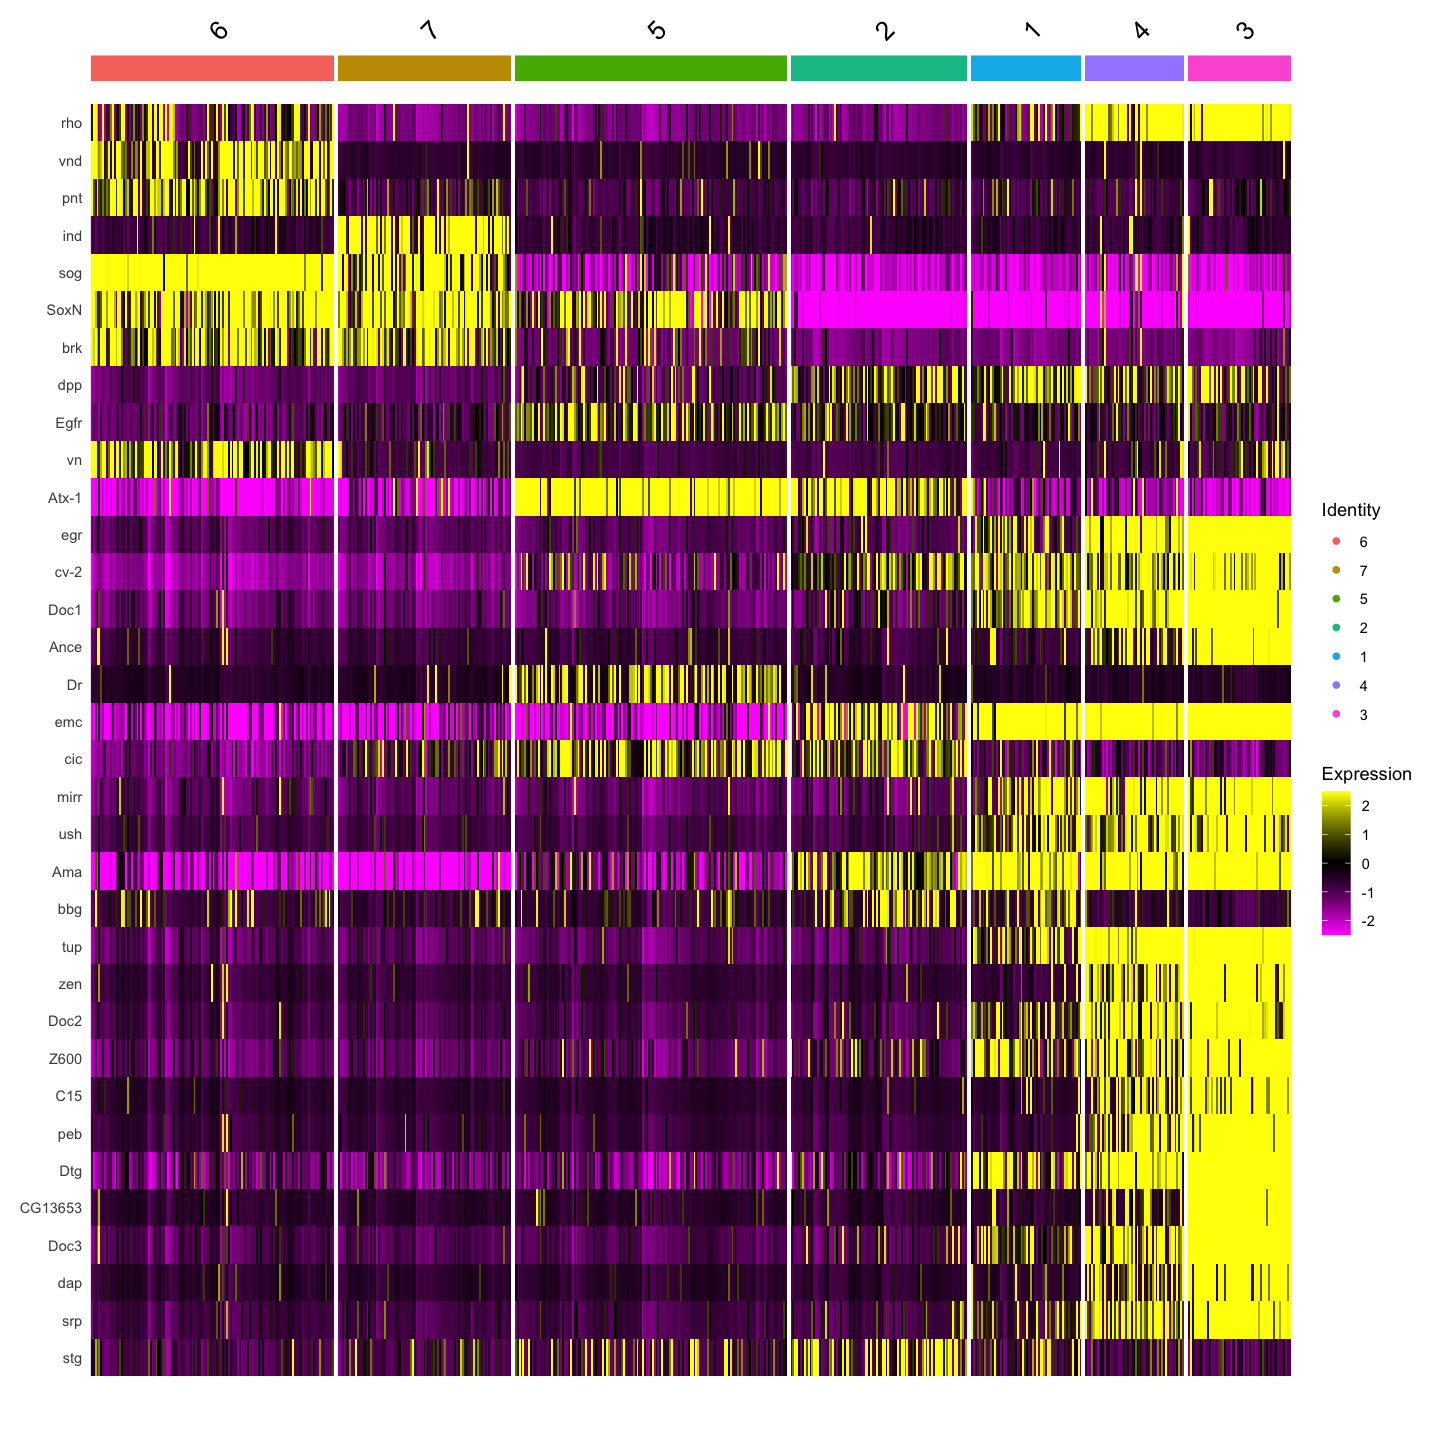

In [31]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.ecto, features = DV_genes)

manual_ID
GSM2494786_CAGAACAAACGA 1        
GSM2494786_AGCTTACTAATC 7        
GSM2494786_GTACGCAATCAT 3        
GSM2494786_CGTTACCCTGTC 6        
GSM2494786_TGCACCGGCCGA 5        
GSM2494786_ATGGACTTCAAA 6

manual_ID               
GSM2494786_CAGAACAAACGA ectoderm_intermediate_DE
GSM2494786_AGCTTACTAATC ectoderm_intermediate_NE
GSM2494786_GTACGCAATCAT amnioserosa             
GSM2494786_CGTTACCCTGTC ectoderm_medial_NE      
GSM2494786_TGCACCGGCCGA ectoderm_lateral_NE     
GSM2494786_ATGGACTTCAAA ectoderm_medial_NE

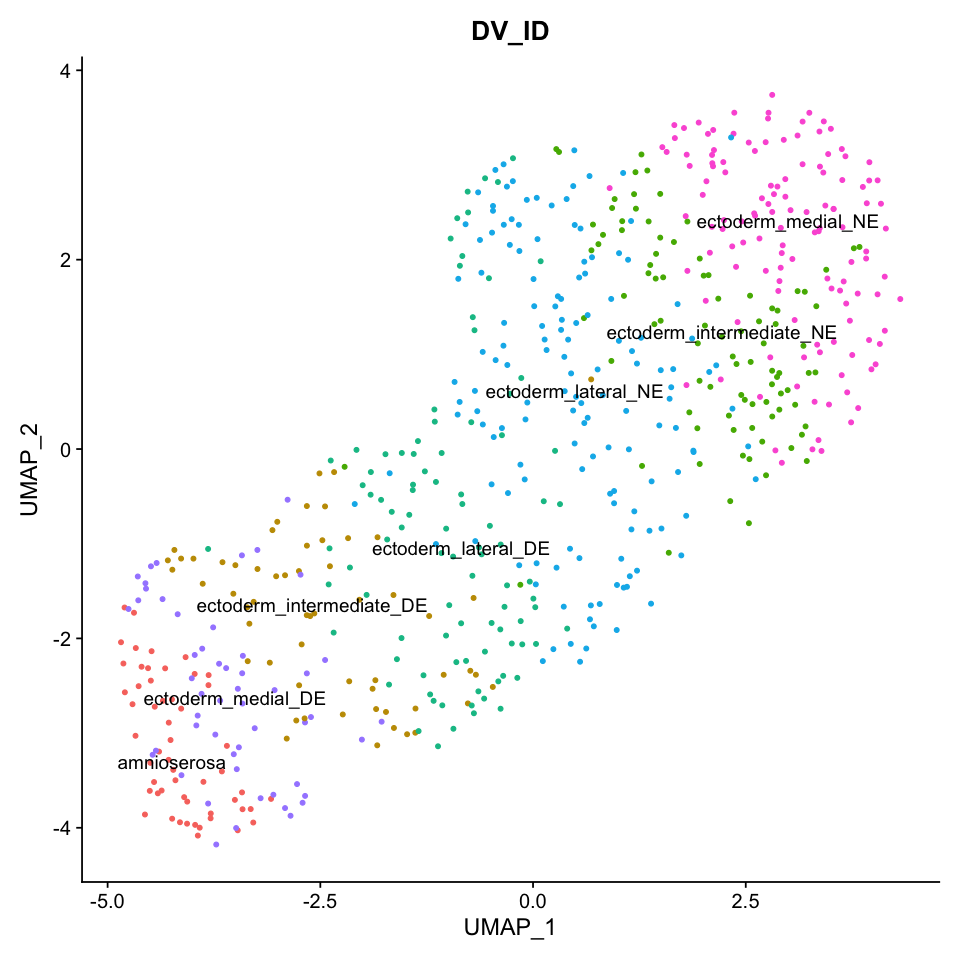

In [32]:
manual_id <- as.data.frame(seu.ecto$DV_ID)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                "6" = "ectoderm_medial_NE", 
                                "7" = "ectoderm_intermediate_NE",
                                "5" = "ectoderm_lateral_NE",
                                "2" = "ectoderm_lateral_DE",
                                "1" = "ectoderm_intermediate_DE",
                                "4" = "ectoderm_medial_DE",
                                "3" = "amnioserosa"
                            )
head(manual_id)

seu.ecto$DV_ID <- manual_id$manual_ID
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'DV_ID',label = TRUE) + NoLegend()

## Merge Annotation

In [33]:
merged.id <- as.data.frame(paste(seu.ecto$DV_ID, seu.ecto$AP_ID,sep = '_'))
colnames(merged.id) <- c('manual_ID')
row.names(merged.id) <- colnames(seu.ecto)
head(merged.id)

manual_ID                     
GSM2494786_CAGAACAAACGA ectoderm_intermediate_DE_trunk
GSM2494786_AGCTTACTAATC ectoderm_intermediate_NE_trunk
GSM2494786_GTACGCAATCAT amnioserosa_amnioserosa       
GSM2494786_CGTTACCCTGTC ectoderm_medial_NE_trunk      
GSM2494786_TGCACCGGCCGA ectoderm_lateral_NE_trunk     
GSM2494786_ATGGACTTCAAA ectoderm_medial_NE_trunk

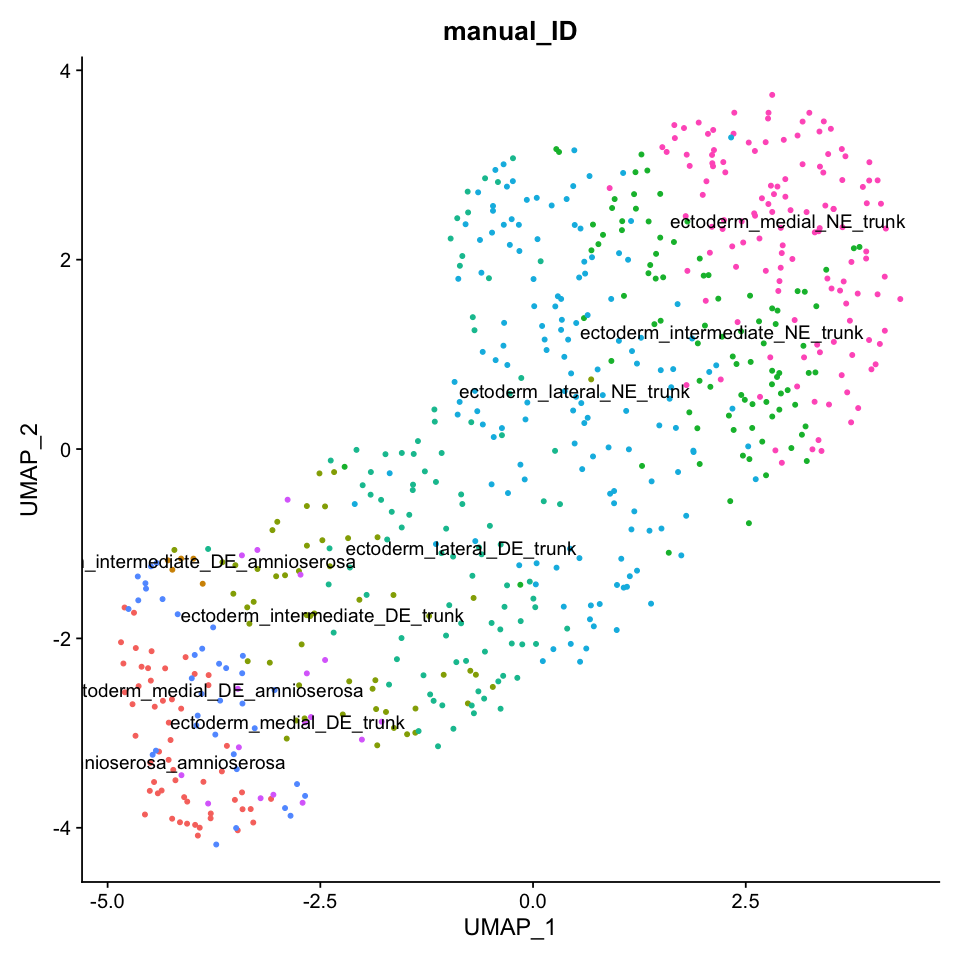

In [34]:
seu.ecto$manual_ID <- merged.id$manual_ID
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'manual_ID',label = TRUE) + NoLegend()

In [35]:
unique(seu.ecto$manual_ID)

[1] "ectoderm_intermediate_DE_trunk"      
[2] "ectoderm_intermediate_NE_trunk"      
[3] "amnioserosa_amnioserosa"             
[4] "ectoderm_medial_NE_trunk"            
[5] "ectoderm_lateral_NE_trunk"           
[6] "ectoderm_lateral_DE_trunk"           
[7] "ectoderm_medial_DE_trunk"            
[8] "ectoderm_medial_DE_amnioserosa"      
[9] "ectoderm_intermediate_DE_amnioserosa"

In [36]:
merged.id$manual_ID <- gsub('amnioserosa_amnioserosa','amnioserosa_trunk', merged.id$manual_ID)
merged.id$manual_ID <- gsub('ectoderm_intermediate_DE_amnioserosa','amnioserosa_trunk', merged.id$manual_ID)
merged.id$manual_ID <- gsub('ectoderm_medial_DE_amnioserosa','amnioserosa_trunk', merged.id$manual_ID)
unique(merged.id$manual_ID)

[1] "ectoderm_intermediate_DE_trunk" "ectoderm_intermediate_NE_trunk"
[3] "amnioserosa_trunk"              "ectoderm_medial_NE_trunk"      
[5] "ectoderm_lateral_NE_trunk"      "ectoderm_lateral_DE_trunk"     
[7] "ectoderm_medial_DE_trunk"

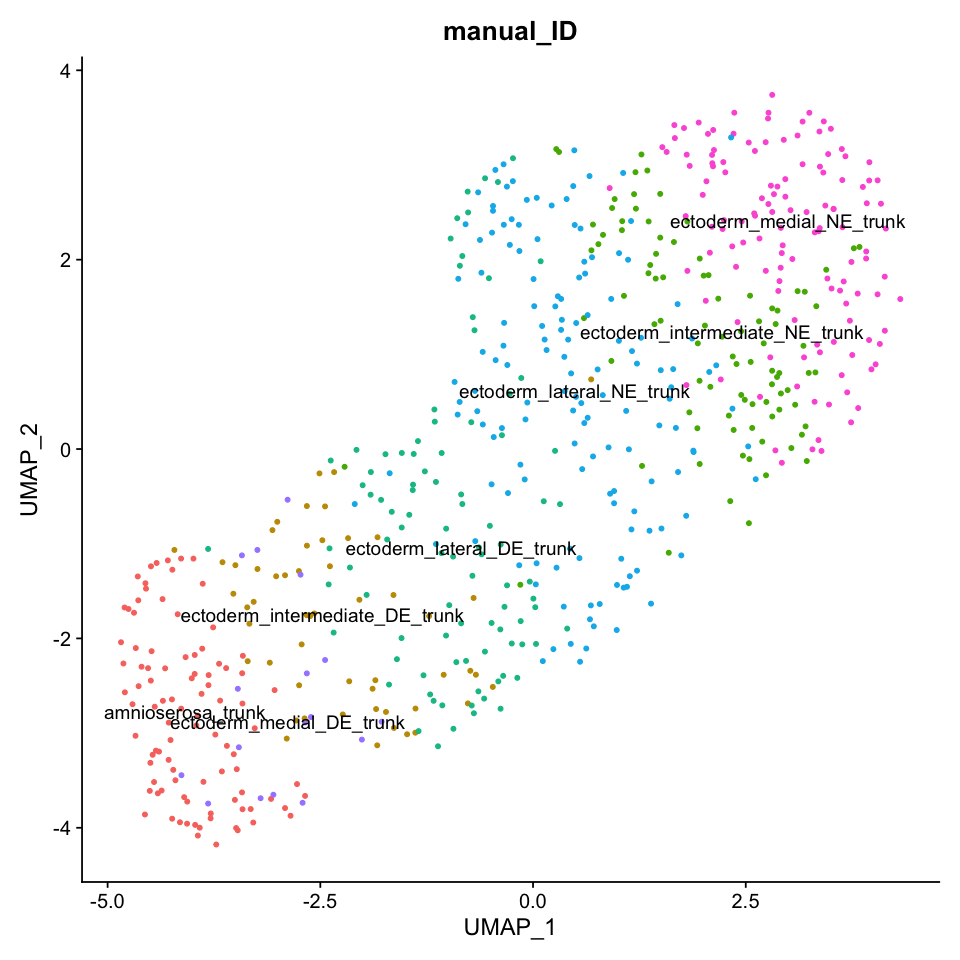

In [37]:
seu.ecto$manual_ID <- merged.id$manual_ID
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'manual_ID',label = TRUE) + NoLegend()

In [38]:
Idents(seu.ecto) <- 'manual_ID'
levels(seu.ecto) <- c('ectoderm_medial_NE_trunk','ectoderm_intermediate_NE_trunk',
                      'ectoderm_lateral_NE_trunk','ectoderm_lateral_DE_trunk',
                      'ectoderm_intermediate_DE_trunk','ectoderm_medial_DE_trunk',
                     'amnioserosa_trunk')
all.markers.ecto <- FindAllMarkers(object = seu.ecto, only.pos = TRUE)
nrow(all.markers.ecto)
all.markers.ecto.top10 <- all.markers.ecto %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.ecto.top10)

Calculating cluster ectoderm_medial_NE_trunk

Calculating cluster ectoderm_intermediate_NE_trunk

Calculating cluster ectoderm_lateral_NE_trunk

Calculating cluster ectoderm_lateral_DE_trunk

Calculating cluster ectoderm_intermediate_DE_trunk

Calculating cluster ectoderm_medial_DE_trunk

Calculating cluster amnioserosa_trunk



[1] 598

[1] 70

Saving 7 x 7 in image



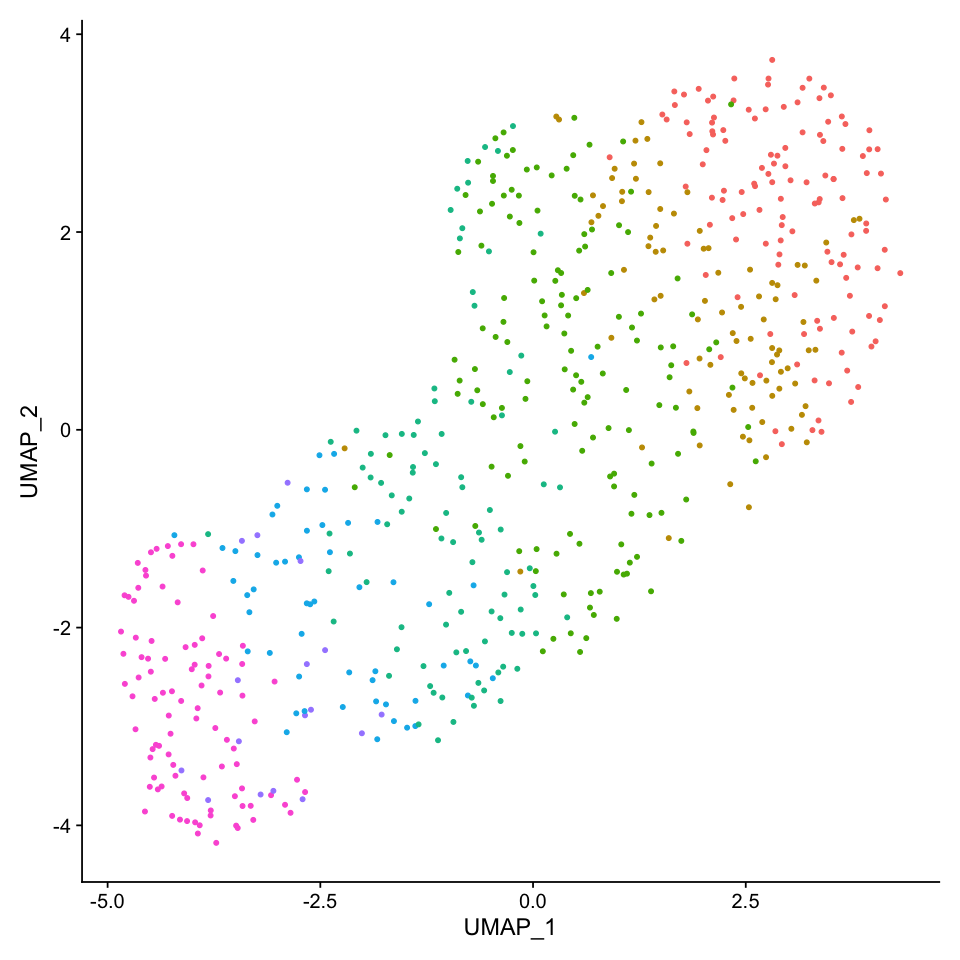

In [39]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.ecto, reduction =  "umap", label = FALSE) + NoLegend() 
fig
ggsave(fig, file = "./figures/03_lateral_ectoderm_subclustering_NK/lateral_ect_umap1.eps", dpi = 300)

Saving 7 x 7 in image



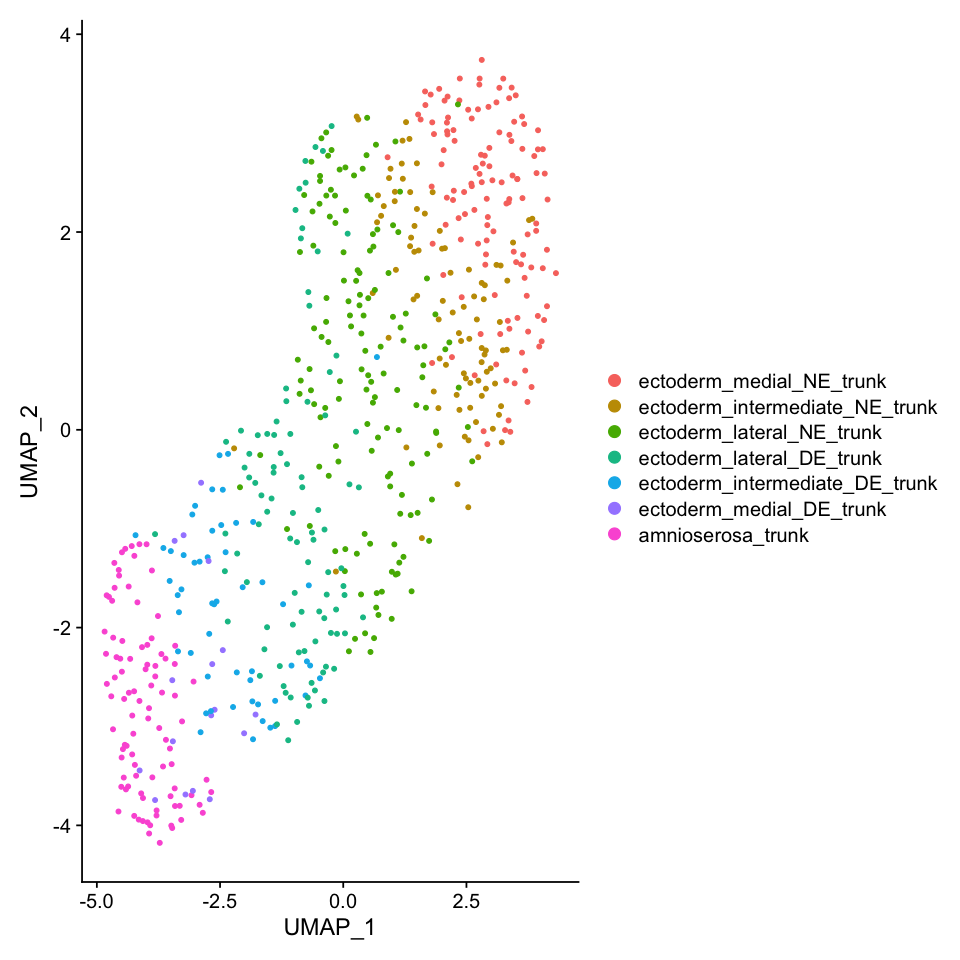

In [40]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.ecto, reduction =  "umap", label = FALSE)
fig
ggsave(fig, file = "./figures/03_lateral_ectoderm_subclustering_NK/lateral_ect_umap2.eps", dpi = 300)

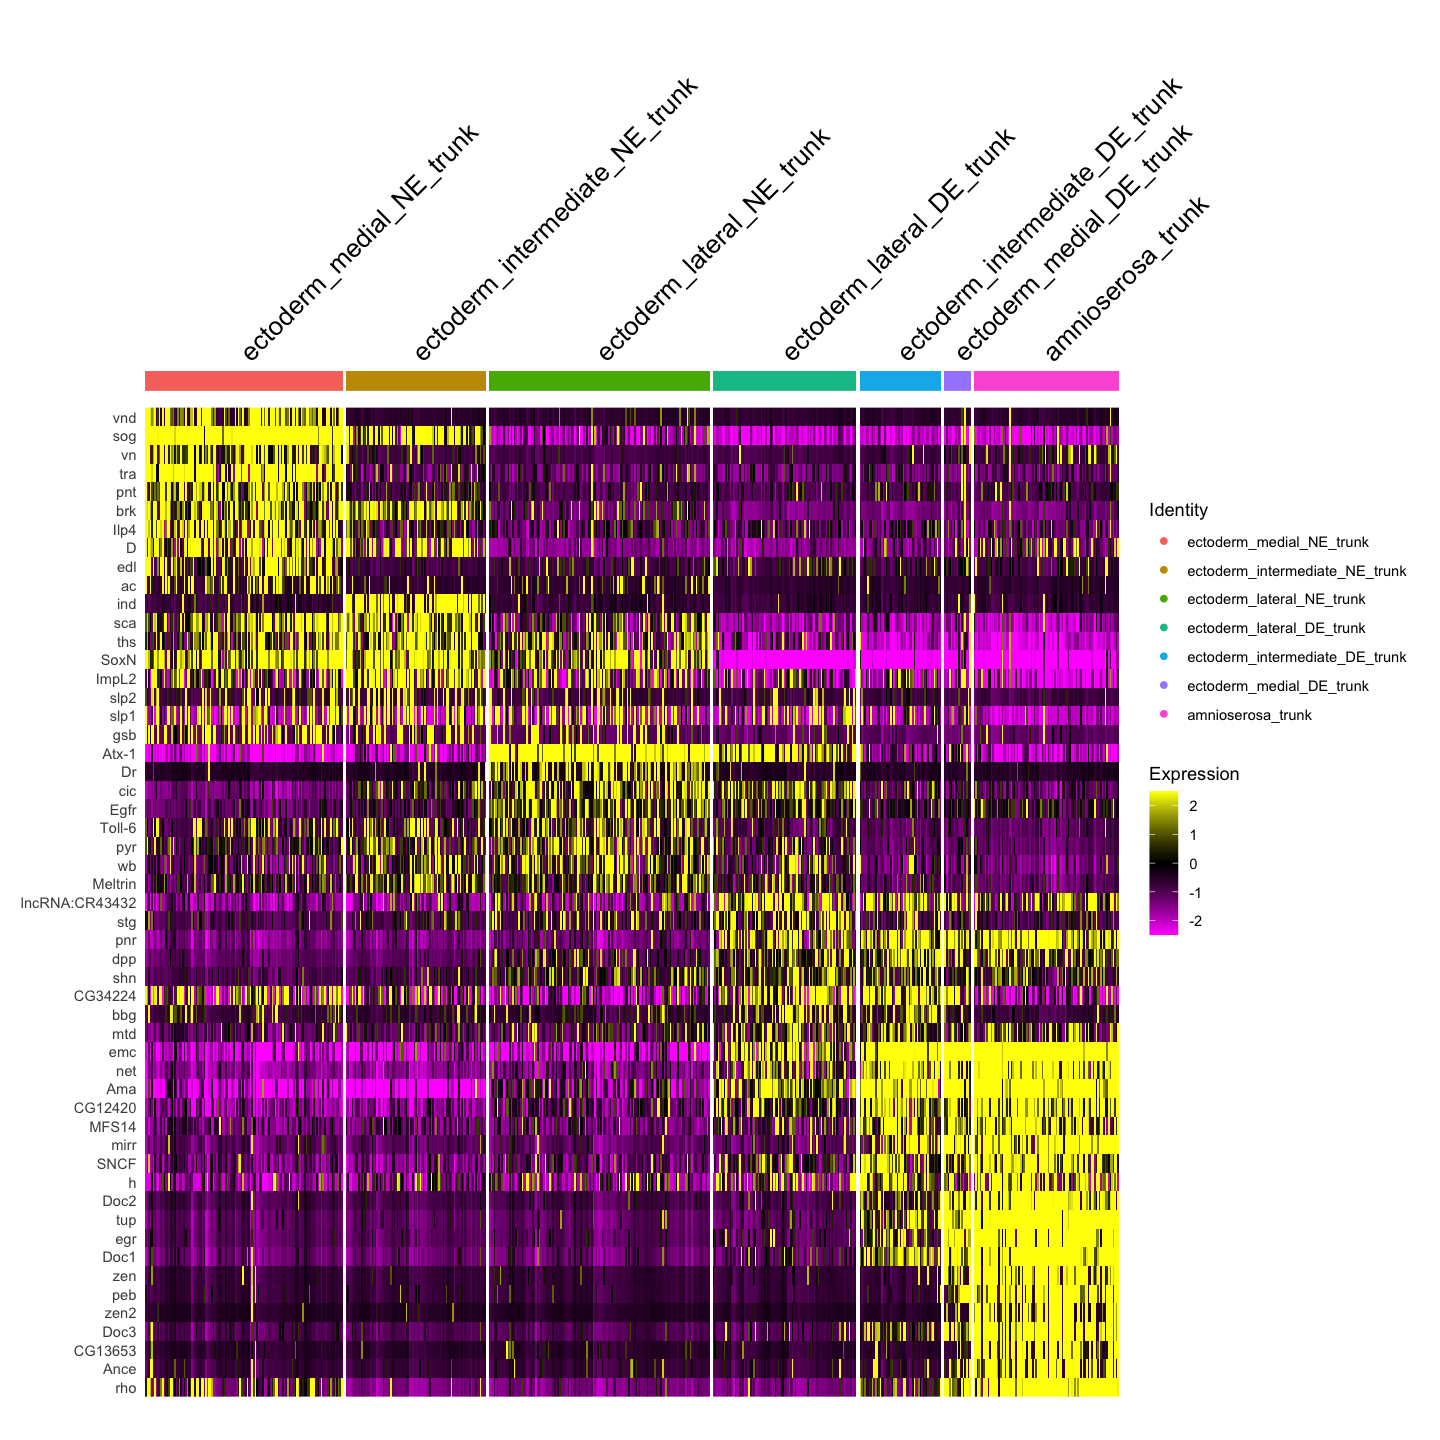

In [41]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.ecto, features = c(all.markers.ecto.top10$gene))
fig
ggsave(fig, file = "./figures/03_lateral_ectoderm_subclustering_NK/lateral_ecto_manualID_heatmap.eps", dpi = 300,  width = 12, height = 12)

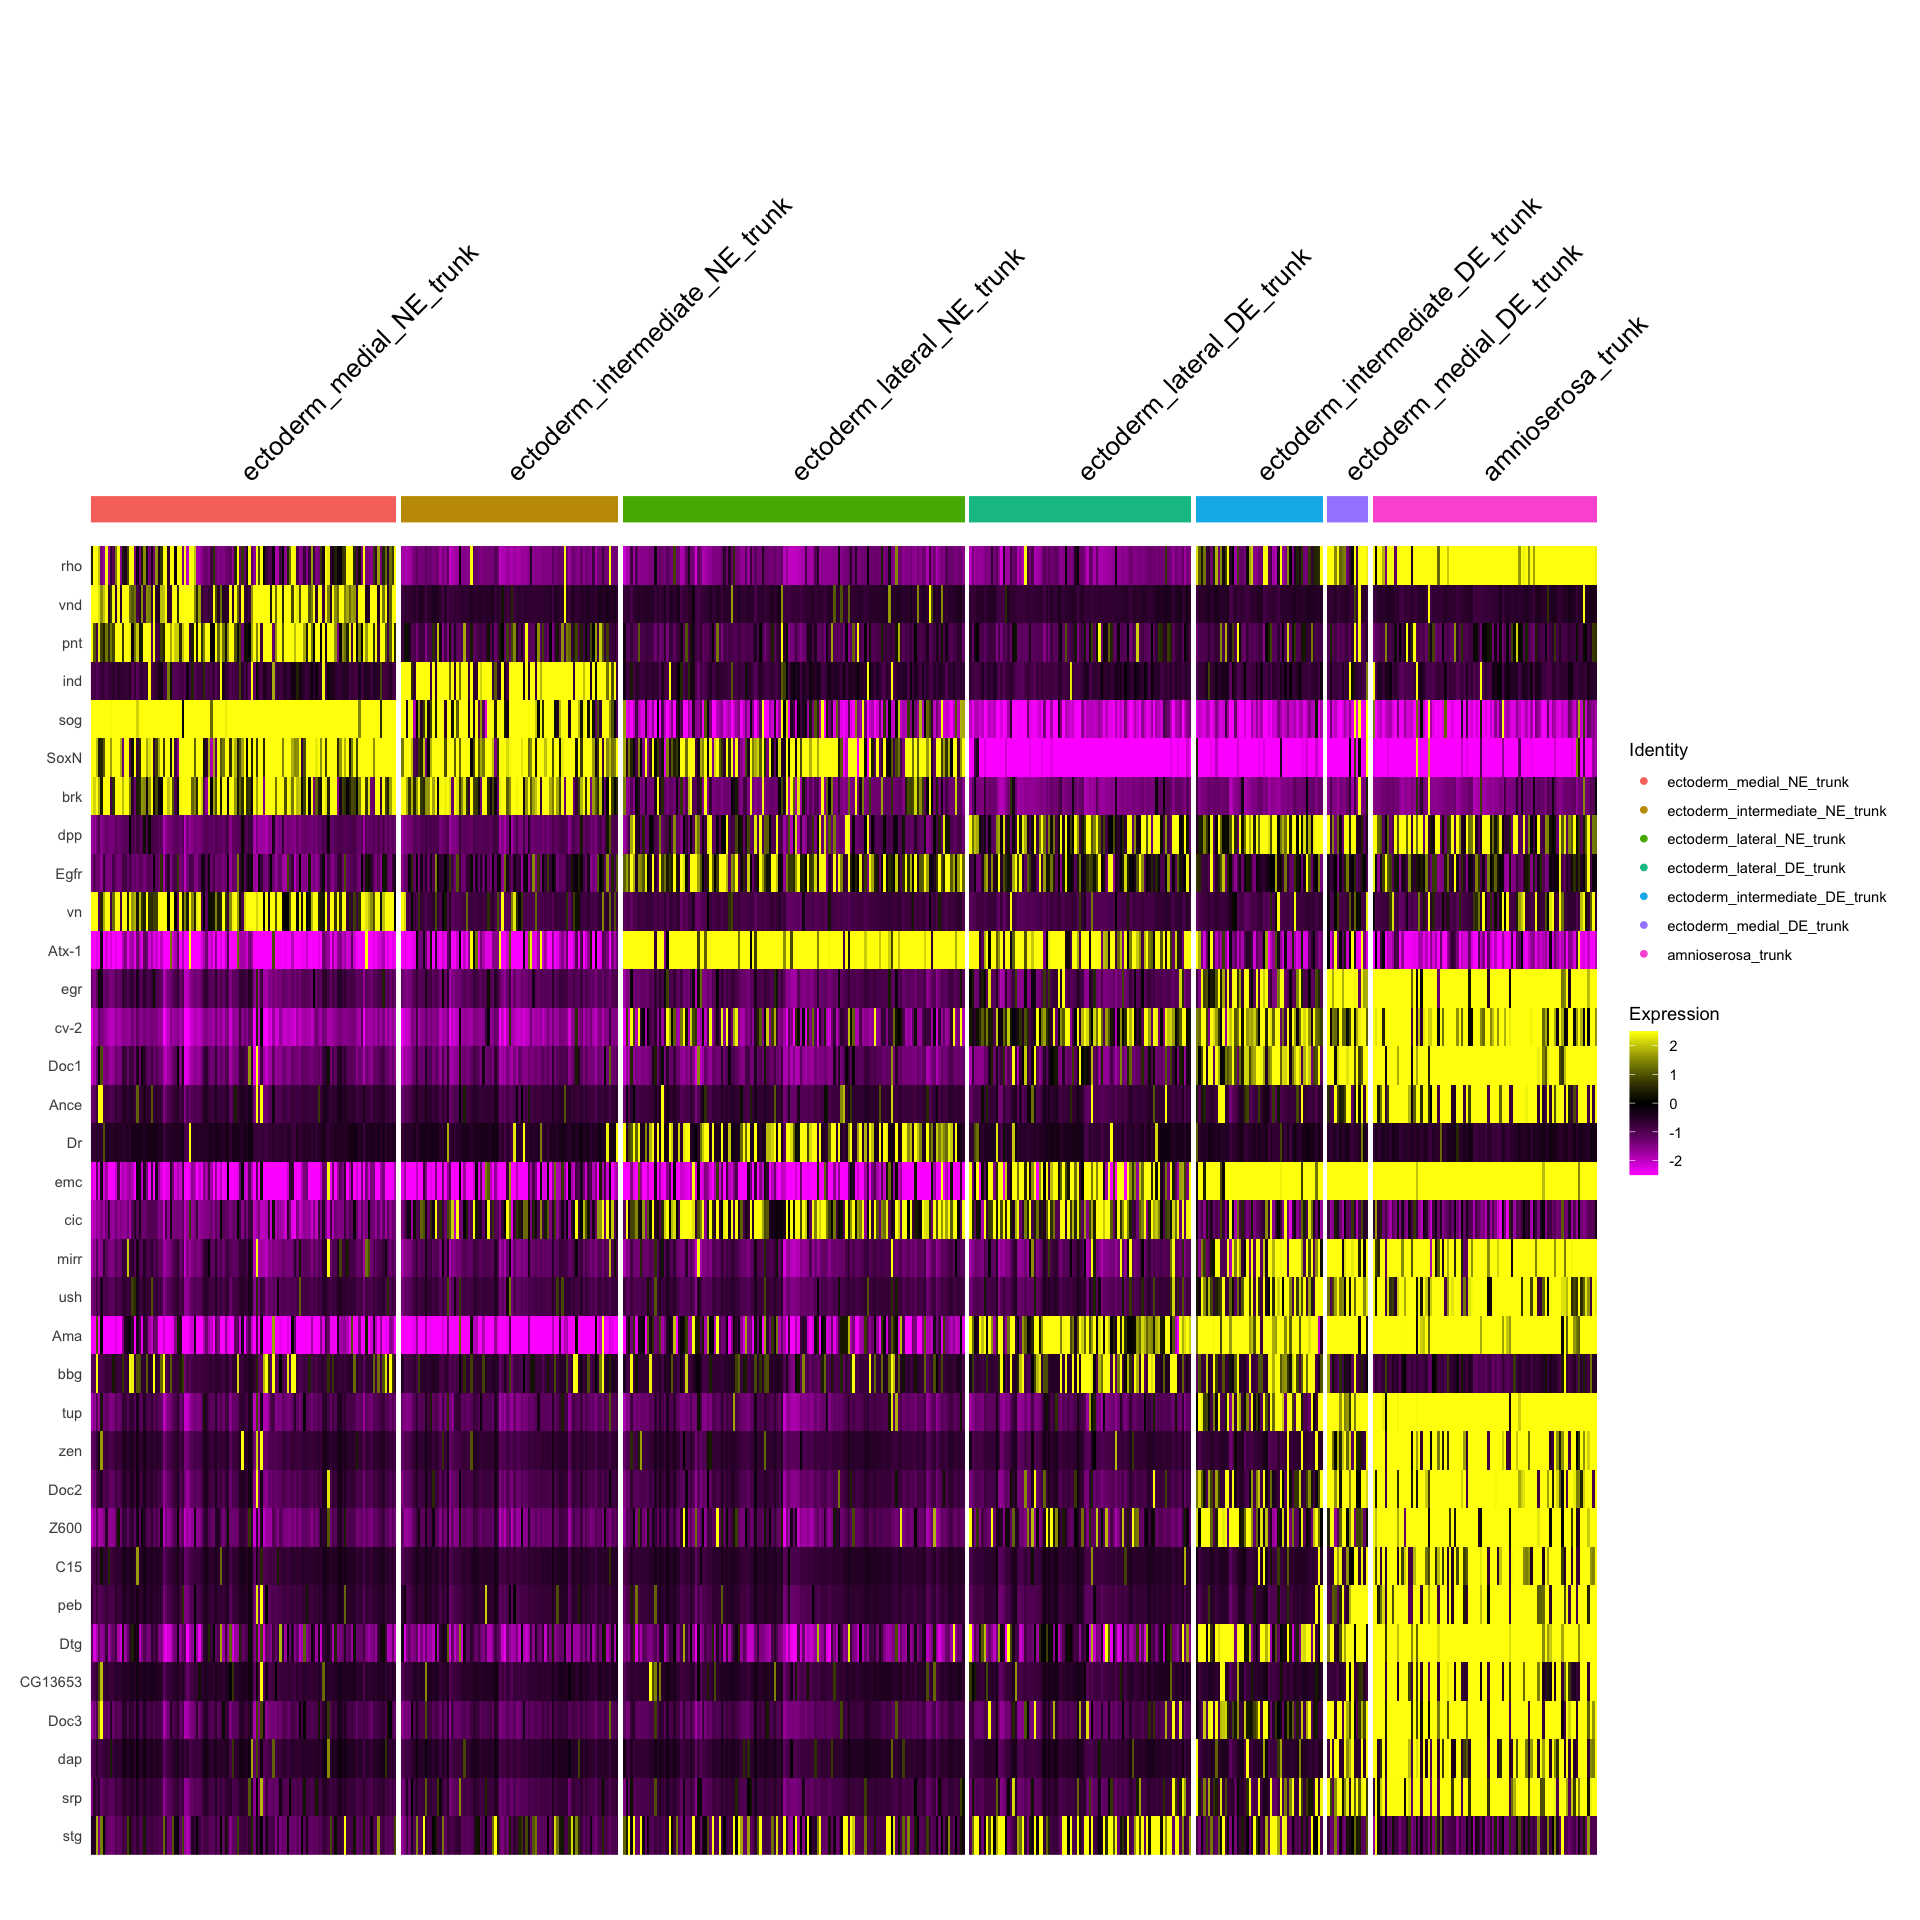

In [42]:
options(repr.plot.width=16, repr.plot.height=16)
DoHeatmap(seu.ecto, features = DV_genes)

In [43]:
seu.merge <- merge(seu.ecto, seu.doublet)
seu.merge

An object of class Seurat 
22816 features across 627 samples within 2 assays 
Active assay: SCT (8695 features, 0 variable features)
 1 other assay present: RNA

In [44]:
saveRDS(object = seu.merge, file = '../../data/seurat_object/NK-data/subclustering/seu_lateral_ecto_subclustering_NK.obj')

In [45]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv